# DATA

In [166]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [167]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()

signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data.resample('5min').mean()
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna() 
CO_Data.shape
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()

In [168]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
#CO_Data=CO_Data.sample(frac=1)
#CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
#CO_Data= (CO_Data-CO_Data.min())/(CO_Data.max()-CO_Data.min())
CO_Data.shape

(44410, 9)

In [169]:
CO_Data1=CO_Data[3:]
CO_Data1.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2019-10-03 15:50:00,555.780140,29.441429,52.018571,399.25210,168.141429,10,3,3,15
2019-10-03 15:55:00,514.393544,29.401071,52.805119,284.54245,136.740190,10,3,3,15
2019-10-03 16:00:00,592.411938,29.211333,53.102667,261.28890,137.737333,10,3,3,16
2019-10-07 10:45:00,1355.690593,32.782750,36.151417,198.86920,314.136500,10,0,7,10
2019-10-07 10:50:00,189.562971,32.399528,37.143389,157.33180,8.279061,10,0,7,10


In [170]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
#O3_Data= (O3_Data-CO_Data.min())/(O3_Data.max()-O3_Data.min())
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [171]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
#NO2_Data= (NO2_Data-NO2_Data.min())/(NO2_Data.max()-NO2_Data.min())
NO2_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_O3
Date,,,,,,,,,,
2019-10-02 11:55:00,460.448301,26.378438,58.063437,15.230400,7.850000,10,2,2,11,46.094860
2019-10-02 12:10:00,1364.583446,25.500000,48.612609,6.665136,37.815652,10,2,2,12,55.810810
2019-10-02 12:15:00,224.159154,25.765087,48.441408,6.642805,12.275893,10,2,2,12,57.907075
2019-10-02 12:20:00,82.998996,26.120078,47.716553,2.844210,13.152720,10,2,2,12,58.880540
2019-10-02 15:45:00,566.301152,30.418466,50.153181,10.084125,9.323533,10,2,2,15,40.068225


In [172]:
import pandas as pd
import scipy.io
import numpy as np
Ref_O3=10*np.array(Ref_O3)
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
#O3_Data= (O3_Data-O3_Data.min())/(O3_Data.max()-O3_Data.min())
O3_Data=O3_Data.dropna()

O3_Data

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2019-10-02 11:55:00,621.625704,26.378438,58.063437,46.094860,3.605625,10,2,2,11,15.230400
2019-10-02 12:10:00,1788.609900,25.500000,48.612609,55.810810,3.528696,10,2,2,12,6.665136
2019-10-02 12:15:00,287.254970,25.765087,48.441408,57.907075,17.781453,10,2,2,12,6.642805
2019-10-02 12:20:00,99.598353,26.120078,47.716553,58.880540,20.285180,10,2,2,12,2.844210
2019-10-07 10:50:00,105.723457,32.399528,37.143389,48.533490,11.862076,10,0,7,10,4.344894
...,...,...,...,...,...,...,...,...,...,...
2020-04-30 23:35:00,60.523932,16.255137,83.573341,22.222497,7.913030,4,3,30,23,3.480461
2020-04-30 23:40:00,64.665593,16.162835,84.568452,28.185830,7.234113,4,3,30,23,3.467720
2020-04-30 23:45:00,58.131073,16.137381,84.388139,29.609723,8.246587,4,3,30,23,3.357663


In [173]:
import numpy as np
from scipy import stats
CO_Data=CO_Data[(np.abs(stats.zscore(CO_Data)) < 3).all(axis=1)]
CO_Data.shape

(42633, 9)

In [174]:
def MAE(pred, y_test):
    pred=np.array(pred)
    y_test=np.array(y_test)
    mae=sum(abs(pred-y_test))/len(y_test)
    return mae

#  New Dataset

import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO_2.txt', header = None,low_memory=False)
data.columns=['C1','C2','C3','C4','Temp','RH','Ref','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)

data=data[['C1','Temp','RH','Ref']]
Data_CO=data
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
#Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data[:3446]
CO_Data=CO_Data.resample('h').mean()
CO_Data.shape

Temp1=CO_Data['Temp'].to_list()
RH1=CO_Data['RH'].to_list()

CO_Data1.tail()
CO_Data1=CO_Data1.resample('h').mean()
CO_Data1['Temp1']=Temp1
CO_Data1['RH1']=RH1
CO_Data1=CO_Data1.dropna()
Temp=CO_Data1['Temp'].to_list()
RH=CO_Data1['RH'].to_list()
Temp2=CO_Data1['Temp1'].to_list()
RH2=CO_Data1['RH1'].to_list()

ind=[i for i in range(len(Temp))]

import matplotlib.pyplot as plt
plt.plot(ind, RH, color='green')
plt.plot(ind, RH2, color='red')
plt.ylabel('RH')
plt.xlabel('Hours')
plt.legend(['Sensor','Station'])

NO2_Data1=NO2_Data.resample('h').mean()
NO2_Data1=NO2_Data1[28:]
NO2_Data1['Temp1']=Temp1
NO2_Data1['RH1']=RH1
NO2_Data1=NO2_Data1.dropna()

O3_Data1=O3_Data.resample('h').mean()
O3_Data1=O3_Data1[28:]
O3_Data1['Temp1']=Temp1
O3_Data1['RH1']=RH1
O3_Data1=O3_Data1.dropna()

CO_Data=CO_Data1
NO2_Data=NO2_Data1
O3_Data=O3_Data1

In [175]:
def MBE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    mbe=np.mean(true-pred)
    return mbe
def CRMSE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    crmse=np.sqrt(np.mean(((true-np.mean(true))-(pred-np.mean(pred)))**2))
    if np.std(pred)>np.std(true):
        crmse=crmse
    else:
        crmse=-crmse
    return crmse

def sMAE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    smae=np.mean(abs(true-pred)/((abs(true)+abs(pred))/2))
    return smae

In [176]:
def sMAE(true,pred):
    true=np.array(true)
    pred=np.array(pred)
    mae=sum(abs(pred-true))/len(pred)
    nmae=mae/np.mean(true)
    return 1-nmae

In [177]:
from scipy.stats import chi2
p = np.array([ 0.9])
df=np.array(range(1,10000))
chi = [0]+list(chi2.isf(p, df))

In [178]:
import scipy.stats

#find T critical value
scipy.stats.t.ppf(q=.95,df=100)

1.66023432606575

In [179]:
def precision(pred,true):
    pred=list(pred)
    true=list(true)
    for i in range(len(true)):
        if true[i]==0:
            true.pop(i)
            pred.pop(i)
    pred=np.array(pred)
    true=np.array(true)
    #d=((pred-true)/((true+pred)/2))*100
    d=((pred-true)/np.mean(true))*100
    n=len(pred)
    A=np.sqrt((n-1)/chi[n-1])
    cv=np.sqrt(((n*sum(abs(d)**2)-(sum(abs(d)))**2)/(2*n*(n-1))))*A
    return cv

In [180]:
def bias(pred,true):
    pred=list(pred)
    true=list(true)
    for i in range(len(true)):
        if true[i]==0:
            true.pop(i)
            pred.pop(i)
    pred=np.array(pred)
    true=np.array(true)
    #d=((pred-true)/((true+pred)/2))*100
    d=((pred-true)/np.mean(true))*100
    n=len(pred)
    AB=sum(abs(d))/n
    #AS=np.sqrt(((n*sum(abs(d)**2)-(sum(abs(d)))**2)/(n*(n-1))))
    AS=np.sqrt(sum((d-AB)**2)/(n-1))
    t=scipy.stats.t.ppf(q=.95,df=n-1)
    bias=AB+(t*AS/np.sqrt(n))
    return bias

In [181]:
def IOA(pred,true):
    true=np.array(true)
    pred=np.array(pred)
    frac=sum(abs(true-pred))/sum((abs(pred-np.mean(true))+abs(true-np.mean(true))))
    d=1-frac
    return d  

In [182]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    for i in range(len(P)):
        if P[i]<0:
            P[i]=random.randint(1,100)
    u_cal=(2*np.sqrt(np.array(P))/cal)*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*(0.08*ref)**2+(Beta_0+(Beta_1-1)*ref)**2))/cal)*100
    return u_cal  

In [183]:
def REF2(pred,y_test,alpha,LV):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    #beta_1=((sy_s-sx_s)+np.sqrt((sy_s-sx_s)**2+4*sxy**2))/(2*sxy)
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*(0.001*LV)**2)
    du_s=RSS/(len(cal)-2)
    #Beta_1=((sy_s-sx_s-du_s)+np.sqrt((sy_s-sx_s-du_s)**2+4*sxy**2))/(2*sxy)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    P2=(Beta_1**2+alpha)*(0.001*LV)**2+(-2*Beta_1**2+2*Beta_1-1)*(0.001*LV)**2
    P3=(Beta_0+(Beta_1-1)*LV)**2
    P=P1+P2+P3
    if P<0:
        P=random.randint(1,100)
    u_cal=(2*np.sqrt(P)/(Beta_0+Beta_1*LV))*100
    #u_cal=((2*np.sqrt((RSS/(len(cal)-2))+(1-(beta_1-1)**2)*0.1+(Beta_0+(Beta_1-1)*ref)**2))
    #/cal)*100
    return u_cal  

In [184]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [185]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [186]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [187]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [188]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)


In [189]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

In [190]:
#O3_Data=O3_Data.iloc[::-1]

In [191]:
df1=[x for _, x in O3_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]
#data_mar=data_mar.sample(frac=1)
data_apr=df1[3]
#data_apr=data_apr.sample(frac=1)
data=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]
data_oct.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2019-10-02 11:55:00,621.625704,26.378438,58.063437,46.094860,3.605625,10,2,2,11,15.230400
2019-10-02 12:10:00,1788.609900,25.500000,48.612609,55.810810,3.528696,10,2,2,12,6.665136
2019-10-02 12:15:00,287.254970,25.765087,48.441408,57.907075,17.781453,10,2,2,12,6.642805
2019-10-02 12:20:00,99.598353,26.120078,47.716553,58.880540,20.285180,10,2,2,12,2.844210
2019-10-07 10:50:00,105.723457,32.399528,37.143389,48.533490,11.862076,10,0,7,10,4.344894


In [192]:
data_Oct=data_oct.resample('60min').mean()
data_Oct=data_Oct.dropna()
data_Nov=data_nov.resample('60min').mean()
data_Nov=data_Nov.dropna()
data_Dec=data_dec.resample('60min').mean()
data_Dec=data_Dec.dropna()
data_Jan=data_jan.resample('60min').mean()
data_Jan=data_Jan.dropna()
data_Feb=data_feb.resample('60min').mean()
data_Feb=data_Feb.dropna()
data_Mar=data_mar.resample('60min').mean()
data_Mar=data_Mar.dropna()
data_Apr=data_apr.resample('60min').mean()
data_Apr=data_Apr.dropna()

Temp=data_Jan['RH'].to_list()
len(Temp)

ind=[i for i in range(len(Temp))]
plt.plot(ind,Temp)

In [193]:
df2=[x for _, x in O3_Data.groupby('Month')]
data_oct2=df2[4]
#data_oct2=data_oct2.sample(frac=1)
data_nov2=df2[5]
#data_nov2=data_nov2.sample(frac=1)
data_dec2=df2[6]
#data_dec2=data_dec2.sample(frac=1)
data_jan2=df2[0]
#data_jan2=data_jan2.sample(frac=1)
data_feb2=df2[1]
#data_feb2=data_feb2.sample(frac=1)
data_mar2=df2[2]
#data_mar2=data_mar2.sample(frac=1)
data_apr2=df2[3]
#data_apr2=data_apr2.sample(frac=1)
data=[data_oct2,data_nov2,data_dec2,data_jan2,data_feb2,data_mar2]
data_feb2.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2020-02-14 15:00:00,121.424636,15.130260,53.920912,27.811665,3.875583,2,4,14,15,18.995165
2020-02-14 15:05:00,97.965370,15.088266,54.620724,28.450277,4.498775,2,4,14,15,21.162180
2020-02-14 16:10:00,89.752931,13.271542,61.067292,26.522085,1.582542,2,4,14,16,17.001195
2020-02-14 16:15:00,97.043600,13.187583,61.158583,24.511943,1.419583,2,4,14,16,23.019373
2020-02-14 16:20:00,95.767470,13.104631,61.276556,25.317920,1.699226,2,4,14,16,21.306785


In [194]:
data_Oct2=data_oct2.resample('60min').mean()
data_Oct2=data_Oct2.dropna()
data_Nov2=data_nov2.resample('60min').mean()
data_Nov2=data_Nov2.dropna()
data_Dec2=data_dec2.resample('60min').mean()
data_Dec2=data_Dec2.dropna()
data_Jan2=data_jan2.resample('60min').mean()
data_Jan2=data_Jan2.dropna()
data_Feb2=data_feb2.resample('60min').mean()
data_Feb2=data_Feb2.dropna()
data_Mar2=data_mar2.resample('60min').mean()
data_Mar2=data_Mar2.dropna()
data_Apr2=data_apr2.resample('60min').mean()
data_Apr2=data_Apr2.dropna()

In [195]:
df3=[x for _, x in O3_Data.groupby('Month')]
data_oct3=df3[4]
#data_oct3=data_oct3.sample(frac=1)
data_nov3=df3[5]
#data_nov3=data_nov3.sample(frac=1)
data_dec3=df3[6]
#data_dec3=data_dec3.sample(frac=1)
data_jan3=df3[0]
#data_jan3=data_jan3.sample(frac=1)
data_feb3=df3[1]
#data_feb3=data_feb3.sample(frac=1)
data_mar3=df3[2]
#data_mar3=data_mar3.sample(frac=1)
data_apr3=df3[3]
#data_apr3=data_apr3.sample(frac=1)
data=[data_oct3,data_nov3,data_dec3,data_jan3,data_feb3,data_mar3]
data_feb3.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2020-02-14 15:00:00,121.424636,15.130260,53.920912,27.811665,3.875583,2,4,14,15,18.995165
2020-02-14 15:05:00,97.965370,15.088266,54.620724,28.450277,4.498775,2,4,14,15,21.162180
2020-02-14 16:10:00,89.752931,13.271542,61.067292,26.522085,1.582542,2,4,14,16,17.001195
2020-02-14 16:15:00,97.043600,13.187583,61.158583,24.511943,1.419583,2,4,14,16,23.019373
2020-02-14 16:20:00,95.767470,13.104631,61.276556,25.317920,1.699226,2,4,14,16,21.306785


In [196]:
data_Oct3=data_oct3.resample('60min').last()
data_Oct3=data_Oct3.dropna()
data_Nov3=data_nov3.resample('60min').last()
data_Nov3=data_Nov3.dropna()
data_Dec3=data_dec3.resample('60min').last()
data_Dec3=data_Dec3.dropna()
data_Jan3=data_jan3.resample('60min').last()
data_Jan3=data_Jan3.dropna()
data_Feb3=data_feb3.resample('60min').last()
data_Feb3=data_Feb3.dropna()
data_Mar3=data_mar3.resample('60min').last()
data_Mar3=data_Mar3.dropna()
data_Apr3=data_apr3.resample('60min').last()
data_Apr3=data_Apr3.dropna()

In [197]:
data_Oct3

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2019-10-02 11:00:00,621.625704,26.378438,58.063437,46.094860,3.605625,10.0,2.0,2.0,11.0,15.230400
2019-10-02 12:00:00,99.598353,26.120078,47.716553,58.880540,20.285180,10.0,2.0,2.0,12.0,2.844210
2019-10-07 10:00:00,110.669169,32.289000,37.378125,45.984525,11.033542,10.0,0.0,7.0,10.0,4.166651
2019-10-07 11:00:00,145.934737,36.586708,32.431417,47.910815,12.648250,10.0,0.0,7.0,11.0,8.230621
2019-10-07 12:00:00,260.566848,34.527578,32.699732,49.135953,3.073537,10.0,0.0,7.0,12.0,5.435194
...,...,...,...,...,...,...,...,...,...,...
2019-10-31 19:00:00,107.920431,19.151852,72.105362,9.720208,3.490208,10.0,3.0,31.0,19.0,29.040065
2019-10-31 20:00:00,94.910725,18.313667,74.531250,3.432125,4.673810,10.0,3.0,31.0,20.0,35.918170
2019-10-31 21:00:00,80.634312,17.822078,76.417224,16.595835,5.533771,10.0,3.0,31.0,21.0,20.285320


In [198]:
from sklearn.linear_model import LinearRegression

In [199]:
from xgboost import  XGBRegressor
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# create an xgboost regression model
#n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9,colsample_bytree=0.4,alpha=10
model = XGBRegressor(n_estimators=10000, max_depth=5, eta=0.01, subsample=0.9, 
                     colsample_bytree=0.4,alpha=10)

In [200]:
def REF(pred,y_test,alpha):
    import random
    cal=np.array(pred)
    ref=np.array(y_test.to_list())
    for i in range(len(ref)):
        if ref[i]==0:
            ref[i]=np.mean(ref)
    ref_mean=np.mean(ref)
    cal_mean=np.mean(cal)
    prec=np.array([20 for i in range(len(ref))])
    u=np.maximum(prec,0.001*ref)
    u=0.001*ref
    #cal=np.log(cal)
    #ref=np.log(ref)
    sx_s=(1/len(ref))*sum((ref-ref_mean)**2)
    sy_s=(1/len(cal))*sum((cal-cal_mean)**2)
    sxy=(1/len(cal))*sum((cal-cal_mean)*(ref-ref_mean))
    beta_1=((sy_s-alpha*sx_s)+np.sqrt((sy_s-sx_s)**2+4*alpha*sxy**2))/(2*sxy)
    beta_0=cal_mean-beta_1*ref_mean
    RSS=sum((cal-beta_0-beta_1*ref)**2-(beta_1**2+alpha)*u**2)
    du_s=RSS/(len(cal)-2)
    Beta_1=((sy_s-alpha*sx_s-du_s)+np.sqrt((sy_s-alpha*sx_s-du_s)**2+4*alpha*sxy**2))/(2*sxy)
    Beta_0=cal_mean-Beta_1*ref_mean
    P1=(RSS/(len(cal)-2))
    #P2=(Beta_1**2+alpha)*u**2+(-2*Beta_1**2+2*Beta_1-1)*u**2
    P2=-(u**2)
    P3=(Beta_0+(Beta_1-1)*ref)**2
    P=[]
    for i in range(len(P3)):
        P.append(P1+P2[i]+P3[i])
    U1=[]
    Ref=[]
    for i in range(len(P)):
        if P[i]>=0:
            U1.append(P[i])
            Ref.append(ref[i])
    #for i in range(len(P)):
        #if P[i]<0:
           # P[i]=np.mean(P1)
    u_cal=(2*np.sqrt(np.array(U1))/np.array(Ref))*100
    U_cal=[]
    for i in range(len(Ref)):
        if Ref[i]==max(Ref):
            U_cal.append(u_cal[i])
    return U_cal[0]

import sklearn.metrics as sm
from flaml import AutoML
X=data_Oct[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=data_Oct['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 50,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,
           **automl_settings,estimator_list=["rf"])#,estimator_list=["xgboost"]
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)


plt.plot(y_test,y_test, color='red')
plt.scatter(pred,y_test)

# Mothly schemes

# Oct 2019

# RF

In [201]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
#from sklearn.metrics import mean_absolute_error as mae
#from sklearn.metrics import mean_absolute_percentage_error
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(max_features=0.38328515902344024, max_leaf_nodes=2566,
                      n_estimators=911, n_jobs=-1)

#regressor= LinearRegression()


In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler2=StandardScaler()

co_data=O3_Data
co_data=co_data.resample('60min').mean()
co_data=co_data.dropna()
X=co_data[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
y=co_data['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)
model=regressor.fit(X_train,y_train)
pred=model.predict(X_test)
rmse_r=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
rmse_r

A=['Net Signal','Temp','RH','Month','Day_of_week','Hour']
B='Ref'
frame1=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Mar]#,data_feb
Train1=pd.concat(frame1)
train1=Train1.sample(frac=1)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train1)
mask = yhat != -1
train1= train1[mask]
test1=data_Apr
yhat = lof.fit_predict(test1)
mask = yhat != -1
test1= test1[mask]

frame2=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Apr]#,data_feb
Train2=pd.concat(frame2)
train2=Train2.sample(frac=1)
yhat = lof.fit_predict(train2)
mask = yhat != -1
train2= train2[mask]
test2=data_Mar
yhat = lof.fit_predict(test2)
mask = yhat != -1
test2= test2[mask]

frame3=[data_Oct,data_Nov,data_Dec,data_Jan,data_Mar,data_Apr]#,data_feb
Train3=pd.concat(frame3)
train3=Train3.sample(frac=1)
yhat = lof.fit_predict(train3)
mask = yhat != -1
train3= train3[mask]
test3=data_Feb
yhat = lof.fit_predict(test3)
mask = yhat != -1
test3= test3[mask]

frame4=[data_Oct,data_Nov,data_Dec,data_Feb,data_Mar,data_Apr]#,data_feb
Train4=pd.concat(frame4)
train4=Train4.sample(frac=1)
yhat = lof.fit_predict(train4)
mask = yhat != -1
train4= train4[mask]
test4=data_Jan
yhat = lof.fit_predict(test4)
mask = yhat != -1
test4= test4[mask]

frame5=[data_Oct,data_Nov,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train5=pd.concat(frame5)
train5=Train5.sample(frac=1)
yhat = lof.fit_predict(train5)
mask = yhat != -1
train5= train5[mask]
test5=data_Dec
yhat = lof.fit_predict(test5)
mask = yhat != -1
test5= test5[mask]

frame6=[data_Oct,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train6=pd.concat(frame6)
train6=Train6.sample(frac=1)
yhat = lof.fit_predict(train6)
mask = yhat != -1
train6= train6[mask]
test6=data_Nov
yhat = lof.fit_predict(test6)
mask = yhat != -1
test6= test6[mask]

frame7=[data_Nov,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train7=pd.concat(frame7)
train7=Train7.sample(frac=1)
yhat = lof.fit_predict(train7)
mask = yhat != -1
train7= train7[mask]
test7=data_Oct
yhat = lof.fit_predict(test7)
mask = yhat != -1
test7= test7[mask]


Train=[train1,train2,train3,train4,train5,train6,train7]
Test=[test1,test2,test3,test4,test5,test6,test7]
train=[Train1,Train2,Train3,Train4,Train5,Train6,Train7]


R2=[]
RMSE=[]
R=[]
for i in range(len(Train)):
    model=regressor.fit(Train[i][A],Train[i][B])
    pred=model.predict(Test[i][A])
    r=round(np.corrcoef(Test[i][B], pred)[0, 1],2)
    rmse=round(np.sqrt(sm.mean_squared_error(Test[i][B], pred))/np.mean(Test[i][B]),2)
    #RMSE2=(round(MAE(y_train2[int(0.02*i*X_train2.shape[0]):], pred2),2)/np.mean(y))
    r2=round(sm.r2_score(Test[i][B], pred), 2)
    
    R2.append(r2)
    RMSE.append(rmse)
    R.append(r)

import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(5.3,3.5))
ax = fig.add_axes([0,0,1,1])
x= ['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7']
students1=RMSE
students2= [48,32,22,18,16]
plt.hlines([rmse_r], -0.5, 6.8, color='orange', linewidth=2)
x = np.arange(7)
wid= 0.7
graph1=ax.bar(x,students1,wid, color='#00BFFF', alpha=1)
#graph2=ax.bar(x+0.2,students2,wid, color='#00BFFF', alpha=1)
#plt.legend(['15min','60min'],title='Data resolution')
i= 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.02,
             str(students1[i]),
             ha='center',
             weight='bold',fontsize=10, color='#00BFFF', alpha=1)
    i+=1

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.7, step=0.1))

#plt.xlabel('Tolerance,Tc (%)', fontsize=19)
plt.ylabel('NRMSE', fontsize=19)
plt.setp(ax.spines.values(), linewidth=1.4)
plt.title("O3",fontsize=18)
plt.savefig("Pred_O3.pdf", format="pdf", bbox_inches="tight")
plt.show()

Ref=O3_Data['Ref'].to_list()
Ref_N=O3_Data['Ref_NO2'].to_list()

O3_Data.plot.line(y=['Ref', 'Ref_NO2'], figsize=(10,6))

In [203]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
model = Sequential()
model.add(Dense(3, input_shape = (7,),kernel_initializer='normal', activation= 'linear'))
model.add(Dense(128,kernel_initializer='normal', activation= 'relu'))
model.add(Dense(128, kernel_initializer='normal',activation= 'relu'))
model.add(Dense(100, kernel_initializer='normal',activation= 'relu'))

model.add(Dense(1,kernel_initializer='normal',activation='linear',))
sgd = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics= ['mse', 'mae'])

# October

In [204]:
X=data_Oct[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
y=data_Oct['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
#frame1=[data_oct3,data_nov3]
#fall=pd.concat(frame1)
#Day=[5*i for i in range(1,11) ]
#Fall=fall.resample('h').mean()
#Fall=Fall.dropna()
#X=Fall[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
#y=Fall['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -2
X_train, y_train = X_train[mask], y_train[mask]
print(X_train.shape[0])
X_Data=X_train
y_Data=y_train
X_train2=X_Data[:200]
X_train3=X_Data[:350]
X_train4=X_Data[:550]
#X_train4=X_Data[:2000]
#X_train5=X_Data[:2500]
#X_train6=X_Data[:3000]

y_train2=y_Data[:200]
y_train3=y_Data[:350]
y_train4=y_Data[:550]
#y_train4=y_Data[:2000]
#y_train5=y_Data[:2500]
#y_train6=y_Data[:3000]

B2_o=[]
B3_o=[]
B4_o=[]

P2_o=[]
P3_o=[]
P4_o=[]

model2=regressor.fit(X_train2[:int(0.4*X_train2.shape[0])], 
                         y_train2[:int(0.4*X_train2.shape[0])])
pred2=model2.predict(X_train2[int(0.4*X_train2.shape[0]):])
b=bias(y_train2[int(0.4*X_train2.shape[0]):], pred2)
p=precision(y_train2[int(0.4*X_train2.shape[0]):], pred2)
B2_o.append(b)
P2_o.append(p)

489


In [205]:
A=X_train4[:int(0.1*2*X_train4.shape[0])]
B=X_train4[int(0.1*2*X_train4.shape[0]):]
len(A),len(B)

(97, 392)

In [206]:
er2_o=[]
er3_o=[]
er4_o=[]
MPC2=[]
MPC3=[]
MPC4=[]
RMSE2_o=[]
RMSE3_o=[]
RMSE4_o=[]
R2_o=[]
R3_o=[]
R4_o=[]
U2_o=[]
U3_o=[]
U4_o=[]
KL=[1,2,3,4,5,6,7,8]
B2_o=[]
B3_o=[]
B4_o=[]
P2_o=[]
P3_o=[]
P4_o=[]
for i in KL:
    model2=regressor.fit(X_train2[:int(0.1*i*X_train2.shape[0])], 
                         y_train2[:int(0.1*i*X_train2.shape[0])])
    pred2=model2.predict(X_train2[int(0.1*i*X_train2.shape[0]):])
    rmse2=round(np.corrcoef(y_train2[int(0.1*i*X_train2.shape[0]):], pred2)[0, 1],2)
    RMSE2=(round(np.sqrt(sm.mean_squared_error(y_train2[int(0.1*i*X_train2.shape[0]):], 
                                               pred2)),1)/np.mean(y))
    #RMSE2=(round(MAE(y_train2[int(0.02*i*X_train2.shape[0]):], pred2),2)/np.mean(y))
    r2=round(sm.r2_score(y_train2[int(0.1*i*X_train2.shape[0]):], pred2), 2)
    u2=REF(pred2,y_train2[int(0.1*i*X_train2.shape[0]):],1.4)
    b2=np.round(bias(pred2,y_train2[int(0.1*i*X_train2.shape[0]):]))
    p2=np.round(precision(pred2,y_train2[int(0.1*i*X_train2.shape[0]):]))
    B2_o.append(b2)
    P2_o.append(p2)
    
    U2_o.append(u2)
    RMSE2_o.append(RMSE2)
    R2_o.append(r2)
    er2_o.append(rmse2)
    
for i in KL:
    model3=regressor.fit(X_train3[:int(0.1*i*X_train3.shape[0])], 
                         y_train3[:int(0.1*i*X_train3.shape[0])])
    pred3=model3.predict(X_train3[int(0.1*i*X_train3.shape[0]):])
    rmse3=round(np.corrcoef(y_train3[int(0.1*i*X_train3.shape[0]):], pred3)[0, 1],2)
    
    RMSE3=(round(np.sqrt(sm.mean_squared_error(y_train3[int(0.1*i*X_train3.shape[0]):], 
                                               pred3)),1)/np.mean(y))
    #RMSE3=(round(MAE(y_train3[int(0.02*i*X_train3.shape[0]):], pred3),2)/np.mean(y))
    r3=round(sm.r2_score(y_train3[int(0.1*i*X_train3.shape[0]):], pred3), 2)
    u3=REF(pred3,y_train3[int(0.1*i*X_train3.shape[0]):],1.4)
    U3_o.append(u3)
    RMSE3_o.append(RMSE3)
    R3_o.append(r3)
    er3_o.append(rmse3)
for i in KL:
    model4=regressor.fit(X_train4[:int(0.1*i*X_train4.shape[0])], 
                         y_train4[:int(0.1*i*X_train4.shape[0])])
    pred4=model3.predict(X_train4[int(0.1*i*X_train4.shape[0]):])
    rmse4=round(np.corrcoef(y_train4[int(0.1*i*X_train4.shape[0]):], pred4)[0, 1],2)
    RMSE4=(round(np.sqrt(sm.mean_squared_error(y_train4[int(0.1*i*X_train4.shape[0]):], 
                                               pred4)),1)/np.mean(y))
    #RMSE4=(round(MAE(y_train4[int(0.02*i*X_train4.shape[0]):], pred4),2)/np.mean(y))
    r4=round(sm.r2_score(y_train4[int(0.1*i*X_train4.shape[0]):], pred4), 2)
    u4=REF(pred4,y_train4[int(0.1*i*X_train4.shape[0]):],1.4)
    b4=np.round(bias(pred4,y_train4[int(0.1*i*X_train4.shape[0]):]))
    p4=np.round(precision(pred4,y_train4[int(0.1*i*X_train4.shape[0]):]))
    B4_o.append(b4)
    P4_o.append(p4)
    U4_o.append(u4)
    RMSE4_o.append(RMSE4)
    R4_o.append(r4)
    er4_o.append(rmse4) 

In [207]:
B4_o

[41.0, 39.0, 34.0, 34.0, 34.0, 31.0, 29.0, 25.0]

In [208]:
P4_o

[20.0, 19.0, 16.0, 16.0, 16.0, 15.0, 14.0, 14.0]

In [209]:
U4_o

[53.74999395088137,
 51.35973938565558,
 48.32516593449326,
 54.601614031873844,
 51.2997323148911,
 45.02575507380796,
 41.70147081736072,
 29.043369686579894]

In [210]:
RMSE4_o

[0.4441435965694574,
 0.4135130037025983,
 0.3318314227243073,
 0.3318314227243073,
 0.3165161262908777,
 0.27567533580173226,
 0.28588553342401857,
 0.23483454531258668]

In [211]:
RMSE3_o

[0.49519458468088934,
 0.4441435965694574,
 0.4288283001360279,
 0.3420416203465937,
 0.30630592866859135,
 0.296095731046305,
 0.30120082985744817,
 0.26546513817944584]

In [212]:
RMSE4_o

[0.4441435965694574,
 0.4135130037025983,
 0.3318314227243073,
 0.3318314227243073,
 0.3165161262908777,
 0.27567533580173226,
 0.28588553342401857,
 0.23483454531258668]

In [213]:
A=[er2_o,er3_o,er4_o]
B=[np.mean(er2_o),np.mean(er3_o),np.mean(er4_o)]
for i in range(3):
    if B[i]==max(B):
        er_o=A[i]

A=[R2_o,R3_o,R4_o]
B=[np.mean(R2_o),np.mean(R3_o),np.mean(R4_o)]
for i in range(3):
    if B[i]==max(B):
        R_o=A[i]
A=[RMSE2_o,RMSE3_o,RMSE4_o]
B=[np.mean(RMSE2_o),np.mean(RMSE3_o),np.mean(RMSE4_o)]
for i in range(3):
    if B[i]==min(B):
        RMSE_o=A[i]

# Nov

In [214]:
X=data_Nov[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
y=data_Nov['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
#X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
#frame1=[data_dec3,data_jan3]#,data_feb
#winter=pd.concat(frame1)
#Winter=winter.resample('h').mean()
#Winter=Winter.dropna()
#X=Winter[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
#y=Winter['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -2
X_train, y_train = X_train[mask], y_train[mask]
print(X_train.shape[0])
X_Data=X_train
y_Data=y_train
X_train2=X_Data[:200]
X_train3=X_Data[:350]
X_train4=X_Data[:550]
#X_train4=X_Data[:2000]
#X_train5=X_Data[:2500]
#X_train6=X_Data[:3000]

y_train2=y_Data[:200]
y_train3=y_Data[:350]
y_train4=y_Data[:550]
#y_train4=y_Data[:2000]
#y_train5=y_Data[:2500]
#y_train6=y_Data[:3000]

553


In [215]:
er2_n=[]
er3_n=[]
er4_n=[]
RMSE2_n=[]
RMSE3_n=[]
RMSE4_n=[]
R2_n=[]
R3_n=[]
R4_n=[]
U4_n=[]
for i in KL:
    model2=regressor.fit(X_train2[:int(0.1*i*X_train2.shape[0])], 
                         y_train2[:int(0.1*i*X_train2.shape[0])])
    pred2=model2.predict(X_train2[int(0.1*i*X_train2.shape[0]):])
    rmse2=round(np.corrcoef(y_train2[int(0.1*i*X_train2.shape[0]):], pred2)[0, 1],2)
    RMSE2=(round(np.sqrt(sm.mean_squared_error(y_train2[int(0.1*i*X_train2.shape[0]):],
                                               pred2)),1)/np.mean(y))
    #RMSE2=(round(MAE(y_train2[int(0.02*i*X_train2.shape[0]):], pred2),2)/np.mean(y))
    r2=round(sm.r2_score(y_train2[int(0.1*i*X_train2.shape[0]):], pred2), 2)
    RMSE2_n.append(RMSE2)
    R2_n.append(r2)
    er2_n.append(rmse2)
for i in KL:
    model3=regressor.fit(X_train3[:int(0.1*i*X_train3.shape[0])], 
                         y_train3[:int(0.1*i*X_train3.shape[0])])
    pred3=model3.predict(X_train3[int(0.1*i*X_train3.shape[0]):])
    rmse3=round(np.corrcoef(y_train3[int(0.1*i*X_train3.shape[0]):], pred3)[0, 1],2)
    RMSE3=(round(np.sqrt(sm.mean_squared_error(y_train3[int(0.1*i*X_train3.shape[0]):], 
                                               pred3)),1)/np.mean(y))
    r3=round(sm.r2_score(y_train3[int(0.1*i*X_train3.shape[0]):], pred3), 2)
    #RMSE3=(round(MAE(y_train3[int(0.02*i*X_train3.shape[0]):], pred3),2)/np.mean(y))
    RMSE3_n.append(RMSE3)
    R3_n.append(r3)
    er3_n.append(rmse3)
for i in KL:
    model4=regressor.fit(X_train4[:int(0.1*i*X_train4.shape[0])], 
                         y_train4[:int(0.1*i*X_train4.shape[0])])
    pred4=model3.predict(X_train4[int(0.1*i*X_train4.shape[0]):])
    rmse4=round(np.corrcoef(y_train4[int(0.1*i*X_train4.shape[0]):], pred4)[0, 1],2)
    RMSE4=(round(np.sqrt(sm.mean_squared_error(y_train4[int(0.1*i*X_train4.shape[0]):], 
                                               pred4)),1)/np.mean(y))
    #RMSE4=(round(MAE(y_train4[int(0.02*i*X_train4.shape[0]):], pred4),2)/np.mean(y))
    r4=round(sm.r2_score(y_train4[int(0.1*i*X_train4.shape[0]):], pred4), 2)
    u4=REF(pred4,y_train4[int(0.1*i*X_train4.shape[0]):],1.4)
    U4_n.append(u4)
    RMSE4_n.append(RMSE4)
    R4_n.append(r4)
    er4_n.append(rmse4)
       

In [216]:
U4_n

[63.231595257288475,
 46.84279231942831,
 33.49341003315818,
 39.224802424487436,
 32.18649438631411,
 30.16687692649691,
 40.00062730687809,
 32.36445051726195]

In [217]:
A=[er2_n,er3_n,er4_n]
B=[np.mean(er2_n),np.mean(er3_n),np.mean(er4_n)]
for i in range(3):
    if B[i]==max(B):
        er_n=A[i]

A=[R2_n,R3_n,R4_n]
B=[np.mean(R2_n),np.mean(R3_n),np.mean(R4_n)]
for i in range(3):
    if B[i]==max(B):
        R_n=A[i]
A=[RMSE2_n,RMSE3_n,RMSE4_n]
B=[np.mean(RMSE2_n),np.mean(RMSE3_n),np.mean(RMSE4_n)]
for i in range(3):
    if B[i]==min(B):
        RMSE_n=A[i]

# Dec

In [218]:
X=data_Dec[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
y=data_Dec['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
#frame1=[data_mar3,data_apr3]
#spring=pd.concat(frame1)
#Spring=spring.resample('h').mean()
#Spring=Spring.dropna()
#X=Spring[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
#y=Spring['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -2
X_train, y_train = X_train[mask], y_train[mask]
print(X_train.shape[0])
X_Data=X_train
y_Data=y_train
X_train2=X_Data[:200]
X_train3=X_Data[:350]
X_train4=X_Data[:550]
#X_train4=X_Data[:2000]
#X_train5=X_Data[:2500]
#X_train6=X_Data[:3000]

y_train2=y_Data[:200]
y_train3=y_Data[:350]
y_train4=y_Data[:550]
#y_train4=y_Data[:2000]
#y_train5=y_Data[:2500]
#y_train6=y_Data[:3000]

685


In [219]:
er2_d=[]
er3_d=[]
er4_d=[]
RMSE2_d=[]
RMSE3_d=[]
RMSE4_d=[]
R2_d=[]
R3_d=[]
R4_d=[]
U4_d=[]
for i in KL:
    model2=regressor.fit(X_train2[:int(0.1*i*X_train2.shape[0])], 
                         y_train2[:int(0.1*i*X_train2.shape[0])])
    pred2=model2.predict(X_train2[int(0.1*i*X_train2.shape[0]):])
    rmse2=round(np.corrcoef(y_train2[int(0.1*i*X_train2.shape[0]):], pred2)[0, 1],2)
    RMSE2=(round(np.sqrt(sm.mean_squared_error(y_train2[int(0.1*i*X_train2.shape[0]):], 
                                               pred2)),1)/np.mean(y))
    #RMSE2=(round(MAE(y_train2[int(0.02*i*X_train2.shape[0]):], pred2),2)/np.mean(y))
    r2=round(sm.r2_score(y_train2[int(0.1*i*X_train2.shape[0]):], pred2), 2)
    RMSE2_d.append(RMSE2)
    R2_d.append(r2)
    er2_d.append(rmse2)
for i in KL:
    model3=regressor.fit(X_train3[:int(0.1*i*X_train3.shape[0])], 
                         y_train3[:int(0.1*i*X_train3.shape[0])])
    pred3=model3.predict(X_train3[int(0.1*i*X_train3.shape[0]):])
    rmse3=round(np.corrcoef(y_train3[int(0.1*i*X_train3.shape[0]):], pred3)[0, 1],2)
    RMSE3=(round(np.sqrt(sm.mean_squared_error(y_train3[int(0.1*i*X_train3.shape[0]):], 
                                               pred3)),1)/np.mean(y))
    #RMSE3=(round(MAE(y_train3[int(0.02*i*X_train3.shape[0]):], pred3),2)/np.mean(y))
    r3=round(sm.r2_score(y_train3[int(0.1*i*X_train3.shape[0]):], pred3), 2)
    RMSE3_d.append(RMSE3)
    R3_d.append(r3)
    er3_d.append(rmse3)
for i in KL:
    model4=regressor.fit(X_train4[:int(0.1*i*X_train4.shape[0])], 
                         y_train4[:int(0.1*i*X_train4.shape[0])])
    pred4=model3.predict(X_train4[int(0.1*i*X_train4.shape[0]):])
    rmse4=round(np.corrcoef(y_train4[int(0.1*i*X_train4.shape[0]):], pred4)[0, 1],2)
    RMSE4=(round(np.sqrt(sm.mean_squared_error(y_train4[int(0.1*i*X_train4.shape[0]):], 
                                               pred4)),1)/np.mean(y))
    #RMSE4=(round(MAE(y_train4[int(0.02*i*X_train4.shape[0]):], pred4),2)/np.mean(y))
    r4=round(sm.r2_score(y_train4[int(0.1*i*X_train4.shape[0]):], pred4), 2)
    u4=REF(pred4,y_train4[int(0.1*i*X_train4.shape[0]):],1.4)
    U4_d.append(u4)
    RMSE4_d.append(RMSE4)
    R4_d.append(r4)
    er4_d.append(rmse4)

In [220]:
A=[er2_d,er3_d,er4_d]
B=[np.mean(er2_d),np.mean(er3_d),np.mean(er4_d)]
for i in range(3):
    if B[i]==max(B):
        er_d=A[i]

A=[R2_d,R3_d,R4_d]
B=[np.mean(R2_d),np.mean(R3_d),np.mean(R4_d)]
for i in range(3):
    if B[i]==max(B):
        R_d=A[i]
A=[RMSE2_d,RMSE3_d,RMSE4_d]
B=[np.mean(RMSE2_d),np.mean(RMSE3_d),np.mean(RMSE4_d)]
for i in range(3):
    if B[i]==min(B):
        RMSE_d=A[i]

# Jan

In [221]:
X=data_Jan[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
y=data_Jan['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
X_Data=X_train
y_Data=y_train
X_train2=X_Data[:200]
X_train3=X_Data[:350]
X_train4=X_Data[:550]
#X_train4=X_Data[:2000]
#X_train5=X_Data[:2500]
#X_train6=X_Data[:3000]

y_train2=y_Data[:200]
y_train3=y_Data[:350]
y_train4=y_Data[:550]
#y_train4=y_Data[:2000]
#y_train5=y_Data[:2500]
#y_train6=y_Data[:3000]

In [222]:
er2_j=[]
er3_j=[]
er4_j=[]
RMSE2_j=[]
RMSE3_j=[]
RMSE4_j=[]
R2_j=[]
R3_j=[]
R4_j=[]
U4_j=[]
for i in KL:
    model2=regressor.fit(X_train2[:int(0.1*i*X_train2.shape[0])], 
                         y_train2[:int(0.1*i*X_train2.shape[0])])
    pred2=model2.predict(X_train2[int(0.1*i*X_train2.shape[0]):])
    rmse2=round(np.corrcoef(y_train2[int(0.1*i*X_train2.shape[0]):], pred2)[0, 1],2)
    RMSE2=(round(np.sqrt(sm.mean_squared_error(y_train2[int(0.1*i*X_train2.shape[0]):], 
                                               pred2)),1)/np.mean(y))
    r2=round(sm.r2_score(y_train2[int(0.1*i*X_train2.shape[0]):], pred2), 2)
    RMSE2_j.append(RMSE2)
    R2_j.append(r2)
    er2_j.append(rmse2)
for i in KL:
    model3=regressor.fit(X_train3[:int(0.1*i*X_train3.shape[0])], 
                         y_train3[:int(0.1*i*X_train3.shape[0])])
    pred3=model3.predict(X_train3[int(0.1*i*X_train3.shape[0]):])
    rmse3=round(np.corrcoef(y_train3[int(0.1*i*X_train3.shape[0]):], pred3)[0, 1],2)
    RMSE3=(round(np.sqrt(sm.mean_squared_error(y_train3[int(0.1*i*X_train3.shape[0]):], 
                                               pred3)),1)/np.mean(y))
    r3=round(sm.r2_score(y_train3[int(0.1*i*X_train3.shape[0]):], pred3), 2)
    RMSE3_j.append(RMSE3)
    R3_j.append(r3)
    er3_j.append(rmse3)
for i in KL:
    model4=regressor.fit(X_train4[:int(0.1*i*X_train4.shape[0])], 
                         y_train4[:int(0.1*i*X_train4.shape[0])])
    pred4=model3.predict(X_train4[int(0.1*i*X_train4.shape[0]):])
    rmse4=round(np.corrcoef(y_train4[int(0.1*i*X_train4.shape[0]):], pred4)[0, 1],2)
    RMSE4=(round(np.sqrt(sm.mean_squared_error(y_train4[int(0.1*i*X_train4.shape[0]):],
                                               pred4)),1)/np.mean(y))
    r4=round(sm.r2_score(y_train4[int(0.1*i*X_train4.shape[0]):], pred4), 2)
    u4=REF(pred4,y_train4[int(0.1*i*X_train4.shape[0]):],1.4)
    U4_j.append(u4)
    RMSE4_j.append(RMSE4)
    R4_j.append(r4)
    er4_j.append(rmse4)

In [223]:
A=[er2_j,er3_j,er4_j]
B=[np.mean(er2_j),np.mean(er3_j),np.mean(er4_j)]
for i in range(3):
    if B[i]==max(B):
        er_j=A[i]

A=[R2_j,R3_j,R4_j]
B=[np.mean(R2_j),np.mean(R3_j),np.mean(R4_j)]
for i in range(3):
    if B[i]==max(B):
        R_j=A[i]
A=[RMSE2_j,RMSE3_j,RMSE4_j]
B=[np.mean(RMSE2_j),np.mean(RMSE3_j),np.mean(RMSE4_j)]
for i in range(3):
    if B[i]==min(B):
        RMSE_j=A[i]

In [224]:
data = [[er4_o[i],er4_n[i],er4_d[i],er4_j[i],er2_o[i],er2_n[i],er2_d[i],er2_j[i],
         er3_o[i],er3_n[i],er3_d[i],er3_j[i]] for i in range(8)]

In [225]:
data2 = [[R4_o[i],R4_n[i],R4_d[i],R4_j[i],R2_o[i],R2_n[i],R2_d[i],R2_j[i],
         R3_o[i],R3_n[i],R3_d[i],R3_j[i]] for i in range(8)]

In [226]:
#data3 =[[RMSE2_o[i],RMSE2_n[i],RMSE2_d[i],RMSE2_j[i],RMSE3_o[i],RMSE3_n[i],RMSE3_d[i],RMSE3_j[i],
         #RMSE4_o[i],RMSE4_n[i],RMSE4_d[i],RMSE4_j[i]] for i in range(40)]
data3 =[[RMSE4_o[i],RMSE4_n[i],RMSE4_d[i],RMSE4_j[i]] for i in range(8)]

In [227]:
data4=[[U4_o[i],U4_n[i],U4_d[i],U4_j[i]] for i in range(8)]

In [228]:
Corr_mean3=[]
for i in range(len(data3)):
    corr3=np.mean(data3[i])
    Corr_mean3.append(np.round(corr3,2))
    
Corr_mean3    

[0.48, 0.45, 0.4, 0.38, 0.36, 0.32, 0.34, 0.32]

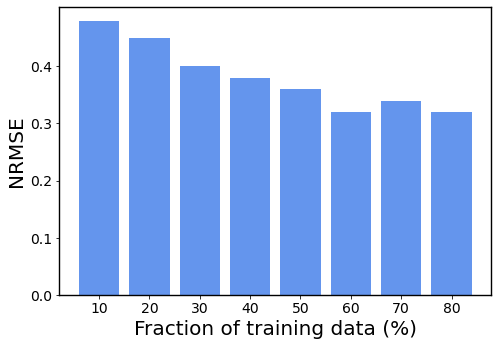

In [229]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['10','20', '30', '40', '50', '60','70','80']
students =Corr_mean3 
graph=ax.bar(langs,students, color='#6495ED')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.5, step=0.1))
plt.ylabel('NRMSE', fontsize=20)
plt.xlabel('Fraction of training data (%)', fontsize=20)
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("CS_RMSE.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [230]:
U_mean=[]
for i in range(len(data4)):
    corr3=np.mean(data4[i])
    U_mean.append(np.round(corr3))
    
U_mean    

[68.0, 62.0, 53.0, 50.0, 47.0, 41.0, 42.0, 37.0]

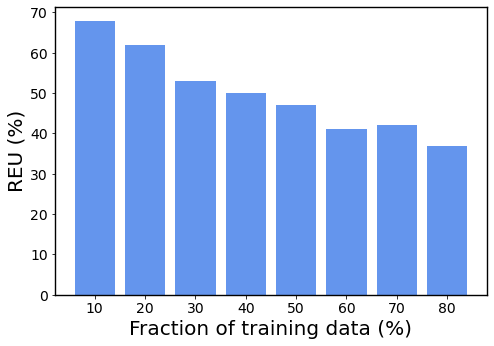

In [231]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs= ['10','20', '30', '40', '50', '60','70','80']
students=U_mean 
graph=ax.bar(langs,students, color='#6495ED')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,80, step=10))
plt.ylabel('REU (%)', fontsize=20)
plt.xlabel('Fraction of training data (%)', fontsize=20)
plt.setp(ax.spines.values(), linewidth=1.4)
#plt.title(r"$O_3$",fontsize=18)
plt.savefig("CS_REU.pdf", format="pdf", bbox_inches="tight")
plt.show()

fig = plt.figure(figsize =(5, 4))
ax = fig.add_subplot(111)
data=Data

#data2=data2
# Creating axes instance
bp = plt.boxplot(data, patch_artist = True,
                 vert = 1,showfliers=False)
#bp2 = ax.boxplot(data2, patch_artist = True,
                 #vert = 1)
#plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.62,1),  fontsize=10)
colors= ['#00688B' for i in range(40)]
#colors2= ['teal' for i in range(40)]
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_color(color)
#for patch, color in zip(bp2['boxes'], colors2):
    #patch.set_color(color)
    
#plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.78,1),  fontsize=10)
for median in bp['medians']:
    median.set(color ='green',
               linewidth = 1)

plt.xlabel('Fraction of training data (%)',fontsize=20)
plt.ylabel('Pearson correlation (r)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,18 , step=2))
plt.yticks(np.arange(0.6,1.01, step=0.1))
#plt.grid(linestyle='-.',linewidth=0)
#ax.spines["bottom"].set_linewidth(1)
#ax.spines["left"].set_linewidth(1)
#ax.spines["top"].set_linewidth(1)
#ax.spines["right"].set_linewidth(1)
ax.set_xticks([2,4,6,8,10,12,14,16])
ax.set_xticklabels(['10','20','30','40','50','60','70','80'])
#plt.legend( fontsize=16)
#plt.title(r"$O_3$",fontsize=16 )

#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("A.pdf",format="pdf", bbox_inches="tight",dpi=1000)
plt.savefig("CS_M_CO.pdf",format="pdf",bbox_inches="tight",dpi=1000)
plt.show()

from scipy.signal import savgol_filter
er21= savgol_filter(er2, 3, 2)
er31= savgol_filter(er3, 3, 2)
er41= savgol_filter(er4, 3, 2)

perc=[5*i for i in range(1,19)]
#plt.plot(perc, er1, color='#0000FF',linewidth=2.5)
plt.plot(perc, er2, color='#00FFFF',linewidth=2.5)
plt.plot(perc, er31, color='#E3CF57',linewidth=2.5)
plt.plot(perc, er41, color='#00008B',linewidth=2.5)
#plt.plot(perc, er51, color='#CD3333',linewidth=2.5)
#plt.plot(perc, er61, color='#9932CC',linewidth=2.5)
plt.ylabel('Pearson correlation (r)', fontsize=18)
plt.xlabel('Training data (%)', fontsize=18)
plt.xlim([0, 80])
plt.ylim([0.7, 1])
legend=plt.legend(['1000','1500','2000','2500','3000'],fontsize=12,loc = 2, bbox_to_anchor = (0.65,0.6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(r"$O_3$", fontsize=14)
legend.set_title("No. data points", prop = {'size':13})

# CO

#X=data_Oct3[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
#y=data_Oct3['Ref']
frame1=[data_oct,data_nov]
fall=pd.concat(frame1)
#fall=fall.sample(frac=1)
Day=[5*i for i in range(1,11) ]
Fall=fall.resample('h').mean()
Fall=Fall.dropna()
X=Fall[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=Fall['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, random_state=51)
#Fall=Fall.sample(frac=1)
P1=[]
B1=[]
corr1=[]
RMSE1=[]
for i in range(1,19):
    regressor.fit(X_train[:int(0.05*i*X_train2.shape[0])], y_train[:int(0.05*i*X_train2.shape[0])])
    pred=regressor.predict(X_train[int(0.05*i*X_train.shape[0]):])
    p1=precision(pred,y_train[int(0.05*i*X_train.shape[0]):])
    b1=bias(pred,y_train[int(0.05*i*X_train.shape[0]):])
    rmse1=round(np.corrcoef(y_train[int(0.05*i*X_train.shape[0]):], pred)[0, 1],2)
    P1.append(p1)
    B1.append(b1)
    corr1.append(rmse1)


In [232]:
#X=data_Oct3[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
#y=data_Oct3['Ref']
frame1=[data_oct,data_nov]
fall=pd.concat(frame1)
#fall=fall.sample(frac=1)
Day=[5*i for i in range(1,11) ]
Fall=fall.resample('60min').mean()
Fall=Fall.dropna()
X=Fall[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=Fall['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
#Fall=Fall.sample(frac=1)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
P11=[]
B11=[]
corr11=[]
RMSE11=[]
R11=[]
U11=[]
for i in KL:
    regressor.fit(X_train[:int(0.1*i*X_train.shape[0])], y_train[:int(0.1*i*X_train.shape[0])])
    pred=regressor.predict(X_train[int(0.1*i*X_train.shape[0]):])
    #p1=precision(pred,y_train[int(0.02*i*X_train.shape[0]):])
    #b1=bias(pred,y_train[int(0.02*i*X_train.shape[0]):])
    rmse11=round(np.corrcoef(y_train[int(0.1*i*X_train.shape[0]):], pred)[0, 1],2)
    r=round(sm.r2_score(y_train[int(0.1*i*X_train.shape[0]):], pred), 2)
    R11.append(r)
    RMSE=(round(np.sqrt(sm.mean_squared_error(y_train[int(0.1*i*X_train.shape[0]):], pred)),1)/
          np.mean(y))
    #RMSE=(round(MAE(y_train[int(0.02*i*X_train.shape[0]):], pred),2)/np.mean(y))
    u11=REF(pred,y_train[int(0.1*i*X_train.shape[0]):],1.4)
    U11.append(u11)
    RMSE11.append(RMSE)
    
    #P11.append(p1)
    #B11.append(b1)
    corr11.append(rmse11)

In [233]:
RMSE11

[0.4647723102126189,
 0.3824075970103826,
 0.3471084342094242,
 0.2882764962078269,
 0.2765101086075074,
 0.2882764962078269,
 0.2706269148073477,
 0.25297733340686845]

In [234]:
U11

[46.485426569003174,
 51.1363588708585,
 41.912429743542745,
 29.838564607934575,
 34.430576840346696,
 34.1151932311269,
 29.794672419284073,
 27.907428196598456]

#X=data_Nov3[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
#y=data_Nov3['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, random_state=71)
frame1=[data_dec,data_jan]#,data_feb
winter=pd.concat(frame1)
#winter=winter.sample(frac=1)
Winter=winter.resample('h').mean()
Winter=Winter.dropna()
#Winter=Winter.sample(frac=1)
X=Winter[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=Winter['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, random_state=81)
P2=[]
B2=[]
corr2=[]
for i in range(1,19):
    regressor.fit(X_train[:int(0.05*i*X_train2.shape[0])], y_train[:int(0.05*i*X_train2.shape[0])])
    pred=regressor.predict(X_train[int(0.05*i*X_train2.shape[0]):])
    p1=precision(pred,y_train[int(0.05*i*X_train2.shape[0]):])
    b1=bias(pred,y_train[int(0.05*i*X_train2.shape[0]):])
    rmse2=round(np.corrcoef(y_train[int(0.05*i*X_train2.shape[0]):], pred)[0, 1],2)
    P2.append(p1)
    B2.append(b1)
    corr2.append(rmse2)

In [235]:
#X=data_Nov3[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
#y=data_Nov3['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,random_state=91)
frame1=[data_dec,data_jan]#,data_feb
winter=pd.concat(frame1)
#winter=winter.sample(frac=1)
Winter=winter.resample('60min').mean()
Winter=Winter.dropna()
#Winter=Winter.sample(frac=1)
X=Winter[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=Winter['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
P21=[]
B21=[]
corr21=[]
R21=[]
RMSE21=[]
U21=[]
for i in KL:
    regressor.fit(X_train[:int(0.1*i*X_train.shape[0])], y_train[:int(0.1*i*X_train.shape[0])])
    pred=regressor.predict(X_train[int(0.1*i*X_train.shape[0]):])
    #p1=precision(pred,y_train[int(0.02*i*X_train.shape[0]):])
    #b1=bias(pred,y_train[int(0.02*i*X_train.shape[0]):])
    rmse21=round(np.corrcoef(y_train[int(0.1*i*X_train.shape[0]):], pred)[0, 1],2)
    r=round(sm.r2_score(y_train[int(0.1*i*X_train.shape[0]):], pred), 2)
    RMSE=(round(np.sqrt(sm.mean_squared_error(y_train[int(0.1*i*X_train.shape[0]):], pred)),1)/np.mean(y))
    #RMSE=(round(MAE(y_train[int(0.02*i*X_train.shape[0]):], pred),2)/np.mean(y))
    u21=REF(pred,y_train[int(0.1*i*X_train.shape[0]):],1.4)
    U21.append(u21)
    RMSE21.append(RMSE)
    R21.append(r)
    corr21.append(rmse21)

In [236]:
RMSE21

[0.6326516903906343,
 0.5596534184224843,
 0.4704333082391896,
 0.5434315802073397,
 0.4623223891316174,
 0.4542114700240451,
 0.3001040069801727,
 0.3568804407331784]

In [237]:
U21

[101.97130425152434,
 81.10231614217676,
 63.209544852769675,
 68.65108986129638,
 58.6201758006538,
 58.78914068003278,
 41.68869915777761,
 43.08283686057884]

#X=data_Dec3[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
#y=data_Dec3['Ref']
frame1=[data_mar,data_apr]
spring=pd.concat(frame1)
Spring=spring.resample('h').mean()
Spring=Spring.dropna()
#Spring=Spring.sample(frac=1)
X=Spring[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=Spring['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, random_state=111)
P3=[]
B3=[]
corr3=[]
for i in range(1,19):
    regressor.fit(X_train[:int(0.05*i*X_train2.shape[0])], y_train[:int(0.05*i*X_train2.shape[0])])
    pred=regressor.predict(X_train[int(0.05*i*X_train2.shape[0]):])
    p1=precision(pred,y_train[int(0.05*i*X_train2.shape[0]):])
    b1=bias(pred,y_train[int(0.05*i*X_train2.shape[0]):])
    rmse3=round(np.corrcoef(y_train[int(0.05*i*X_train2.shape[0]):], pred)[0, 1],2)
    P3.append(p1)
    B3.append(b1)
    corr3.append(rmse3)

In [238]:
#X=data_Dec3[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
#y=data_Dec3['Ref']
frame1=[data_mar,data_apr]
spring=pd.concat(frame1)
Spring=spring.resample('60min').mean()
Spring=Spring.dropna()
#Spring=Spring.sample(frac=1)
X=Spring[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=Spring['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
P31=[]
B31=[]
corr31=[]
R31=[]
RMSE31=[]
U31=[]
for i in KL:
    regressor.fit(X_train[:int(0.1*i*X_train.shape[0])], y_train[:int(0.1*i*X_train.shape[0])])
    pred=regressor.predict(X_train[int(0.1*i*X_train.shape[0]):])
    #p1=precision(pred,y_train[int(0.02*i*X_train.shape[0]):])
    #b1=bias(pred,y_train[int(0.02*i*X_train.shape[0]):])
    rmse31=round(np.corrcoef(y_train[int(0.1*i*X_train.shape[0]):], pred)[0, 1],2)
    r=round(sm.r2_score(y_train[int(0.1*i*X_train.shape[0]):], pred), 2)
    RMSE=(round(np.sqrt(sm.mean_squared_error(y_train[int(0.1*i*X_train.shape[0]):], pred)),1)/np.mean(y))
    #RMSE=(round(MAE(y_train[int(0.02*i*X_train.shape[0]):], pred),2)/np.mean(y))
    u31=REF(pred,y_train[int(0.1*i*X_train.shape[0]):],1.4)
    U31.append(u31)
    RMSE31.append(RMSE)
    R31.append(r)
    
    #P31.append(p1)
    #B31.append(b1)
    corr31.append(rmse31)

In [239]:
RMSE31

[0.2556548103453299,
 0.2058519252131228,
 0.16268942476520995,
 0.1759701941337985,
 0.21249230989741708,
 0.1693298094495042,
 0.1759701941337985,
 0.17265000179165138]

In [240]:
U31

[51.237045367074785,
 36.8021823835764,
 28.702873242703124,
 35.70687771509625,
 41.04558121047157,
 27.056760386771607,
 27.835787399572375,
 25.135350902417013]

plt.plot(ind,D,marker='d',markersize=10, color='black')

In [241]:
Data = [[corr11[i],corr21[i],corr31[i]] for i in range(8)]
Data2=[[R11[i],R21[i],R31[i]] for i in range(8)]
Data3=[[RMSE11[i],RMSE21[i],RMSE31[i]] for i in range(8)]
Data4=[[U11[i],U21[i],U31[i]] for i in range(8)]

In [242]:
Corr_mean3=[]
for i in range(len(Data3)):
    corr3=np.mean(Data3[i])
    Corr_mean3.append(np.round(corr3,2))
    
Corr_mean3  

[0.45, 0.38, 0.33, 0.34, 0.32, 0.3, 0.25, 0.26]

In [243]:
U_mean=[]
for i in range(len(Data4)):
    corr3=np.mean(Data4[i])
    U_mean.append(np.round(corr3))
    
U_mean

[67.0, 56.0, 45.0, 45.0, 45.0, 40.0, 33.0, 32.0]

In [244]:
Corr_mean=[]
Corr_mean2=[]
Corr_mean3=[]
for i in range(len(Data)):
    corr=np.mean(Data[i])
    corr2=np.mean(Data2[i])
    corr3=np.mean(Data3[i])
    Corr_mean.append(corr)
    Corr_mean2.append(corr2)
    Corr_mean3.append(corr3)
np.round(Corr_mean3,2)

array([0.45, 0.38, 0.33, 0.34, 0.32, 0.3 , 0.25, 0.26])

# 6months Calibration Scheme.

In [246]:
#X=data_Dec3[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
#y=data_Dec3['Ref']
frame1=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]
spring=pd.concat(frame1)
Spring=spring.resample('60min').mean()
Spring=Spring.dropna()
#Spring=Spring.sample(frac=1)
X=Spring[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=Spring['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
P31=[]
B31=[]
corr31=[]
R31=[]
RMSE41=[]
U41=[]
for i in KL:
    regressor.fit(X_train[:int(0.1*i*X_train.shape[0])], y_train[:int(0.1*i*X_train.shape[0])])
    pred=regressor.predict(X_train[int(0.1*i*X_train.shape[0]):])
    #p1=precision(pred,y_train[int(0.02*i*X_train.shape[0]):])
    #b1=bias(pred,y_train[int(0.02*i*X_train.shape[0]):])
    rmse31=round(np.corrcoef(y_train[int(0.1*i*X_train.shape[0]):], pred)[0, 1],2)
    r=round(sm.r2_score(y_train[int(0.1*i*X_train.shape[0]):], pred), 2)
    RMSE=(round(np.sqrt(sm.mean_squared_error(y_train[int(0.1*i*X_train.shape[0]):], pred)),1)/np.mean(y))
    #RMSE=(round(MAE(y_train[int(0.02*i*X_train.shape[0]):], pred),2)/np.mean(y))
    u31=REF(pred,y_train[int(0.1*i*X_train.shape[0]):],1.4)
    U41.append(u31)
    RMSE41.append(RMSE)
    R31.append(r)
    
    #P31.append(p1)
    #B31.append(b1)
    corr31.append(rmse31)

In [247]:
RMSE41

[0.4160415955583561,
 0.3317088397019326,
 0.30922010480688633,
 0.326086655978171,
 0.3317088397019326,
 0.29797573735936317,
 0.29797573735936317,
 0.23050953267422433]

In [248]:
U41

[65.8336844825766,
 48.78734791588868,
 44.08930371019163,
 47.26616158411491,
 44.51291236678973,
 38.205196535962074,
 36.8946714779178,
 25.577606574294272]

In [ ]:
import numpy as np

#define moving average function
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

Corr_mean=[]
Corr_mean2=[]
Corr_mean3=[]
for i in range(len(Data)):
    corr=np.mean(Data[i])
    corr2=np.mean(Data2[i])
    corr3=np.mean(Data3[i])
    Corr_mean.append(corr)
    Corr_mean2.append(corr2)
    Corr_mean3.append(corr3)
Diff=abs(((Corr_mean[39]-np.array(Corr_mean))/Corr_mean[39])*100)
Diff2=abs(((Corr_mean2[39]-np.array(Corr_mean2))/Corr_mean2[39])*100)
Diff3=abs(((Corr_mean3[39]-np.array(Corr_mean3)))*100)
Diff=list(Diff[:5]+3*(moving_avg(Diff,6)[0]-Diff[4]))+list(moving_avg(Diff,6))
Diff2=list(Diff2[:5]+3*(moving_avg(Diff2,6)[0]-Diff2[4]))+list(moving_avg(Diff2,6))
Diff3=list(Diff3[:5]+4.5*(moving_avg(Diff3,6)[0]-Diff3[4]))+list(moving_avg(Diff3,6))
A=[i for i in range(1,41)]
#Diff=[Diff[i] for i in range(16) if i%2==0]
#Diff2=[Diff2[i] for i in range(16) if i%2==0]
#Diff3=[Diff3[i] for i in range(16) if i%2==0]
Y_Test=[i for i in np.arange(0,41,1)]
fig= plt.figure(figsize=(6.5,5))
ax = fig.add_subplot(111)
#plt.scatter(A[1],Corr_mean[1], marker="d",s=200,color='darkgoldenrod', alpha=1)
#plt.scatter(A[1],Corr_mean2[1], marker="d",s=200,color='#CD5B45', alpha=0.9)
#plt.legend(['r','R^2'],loc = 2, bbox_to_anchor = (0.7,0.7), fontsize=16)

y1=[-0.5 for i in range(len(Y_Test))]
y2=[2 for i in range(len(Y_Test))]
y4=[4 for i in range(len(Y_Test))]
y6=[6 for i in range(len(Y_Test))]
y8=[8 for i in range(len(Y_Test))]
y10=[10 for i in range(len(Y_Test))]
plt.hlines([2], 0, 45, linestyles='dashed', color='black', linewidth=0.7)
plt.hlines([4], 0, 45, linestyles='dashed', color='black', linewidth=0.7)
plt.hlines([6], 0, 45, linestyles='dashed', color='black', linewidth=0.7)
plt.hlines([8], 0, 45, linestyles='dashed', color='black', linewidth=0.7)
plt.hlines([10], 0, 45, linestyles='dashed', color='black', linewidth=0.7)
m1,=ax.plot(A[:-1],Diff[:-1], color='darkgoldenrod',marker="d",markersize=9, alpha=1)
m2,=ax.plot(A[:-1],Diff[:-1], color='darkgoldenrod',marker="o",markersize=4,markerfacecolor='black', alpha=1)
#plt.plot(Diff2[:-1],A[:-1], color='#CD5B45',marker="d",markersize=13, alpha=0.9)
m3,=ax.plot(A[:-1],Diff3[:-1], color='teal',marker="d",markersize=9, alpha=1)
m4,=ax.plot(A[:-1],Diff3[:-1], color='teal',marker="o",markersize=4,markerfacecolor='black', alpha=1)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show
plt.xlim(0,40)
plt.ylim(0,15)
ax.set_xlim(right=40)
ax.set_ylim(bottom=-0.2)
plt.yticks(np.arange(0,15, step=2))
plt.xticks(np.arange(0,40, step=5))
ax.set_xticks([0,5,10,15,20,25,30,35,40])
ax.set_xticklabels(['0','10','20','30','40','50','60','70','80'],fontsize=16)
plt.ylabel('Change in performance (%)',fontsize=20)
plt.yticks([2,4,6,8,10,12,14])
plt.setp(ax.spines.values(), linewidth=2)
#plt.xlabel('Tolerance, Tc (%)',fontsize=20)
plt.xlabel('Fraction of training data (%)',fontsize=20)
#plt.text(0.2,2, 'Tc=2',fontsize=14)
#plt.text(0.2,4, 'Tc=4',fontsize=14)
#plt.text(0.2,6, 'Tc=6',fontsize=14)
#plt.text(0.2,8, 'Tc=8',fontsize=14)
#plt.text(0.2,10, 'Tc=10',fontsize=14)
textstr = 'CO-Seasonal'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.713, 0.975, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
plt.savefig("CS_CO_S1.pdf",format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
A=np.array(Diff3)
A=np.round(A,2)
A

In [ ]:
import numpy as np

#define moving average function
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

Corr_mean=[]
Corr_mean2=[]
for i in range(len(Data)):
    corr=np.mean(Data[i])
    corr2=np.mean(Data2[i])
    Corr_mean.append(corr)
    Corr_mean2.append(corr2)
Diff=abs(((Corr_mean[39]-np.array(Corr_mean))/Corr_mean[39])*100)
Diff2=abs(((Corr_mean2[39]-np.array(Corr_mean2))/Corr_mean2[39])*100)
Diff3=abs(((max(Corr_mean3)-np.array(Corr_mean3))/min(Corr_mean3))*100)
Diff=list(Diff[:5]+3*(moving_avg(Diff,6)[0]-Diff[4]))+list(moving_avg(Diff,6))
Diff2=list(Diff2[:5]+3*(moving_avg(Diff2,6)[0]-Diff2[4]))+list(moving_avg(Diff2,6))
A=[i for i in range(1,41)]
#Diff=[Diff[i] for i in range(16) if i%2==0]
#Diff2=[Diff2[i] for i in range(16) if i%2==0]
#Diff3=[Diff3[i] for i in range(16) if i%2==0]
Y_Test=[i for i in np.arange(0,41,1)]
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
#plt.scatter(A[1],Corr_mean[1], marker="d",s=200,color='darkgoldenrod', alpha=1)
#plt.scatter(A[1],Corr_mean2[1], marker="d",s=200,color='#CD5B45', alpha=0.9)
#plt.legend(['r','R^2'],loc = 2, bbox_to_anchor = (0.7,0.7), fontsize=16)

y1=[-0.5 for i in range(len(Y_Test))]
y2=[2 for i in range(len(Y_Test))]
y4=[4 for i in range(len(Y_Test))]
y6=[6 for i in range(len(Y_Test))]
y8=[8 for i in range(len(Y_Test))]
y10=[10 for i in range(len(Y_Test))]
plt.scatter(A[:-1],Diff[:-1], marker="d",s=50,color='darkgoldenrod', alpha=1)
plt.scatter(A[:-1],Diff2[:-1], marker="d",s=50,color='#CD5B45', alpha=0.9)
#plt.legend(['r','R^2'],loc = 2, bbox_to_anchor = (0.68,0.8), fontsize=16)
plt.fill_between(np.array(Y_Test), y1, y2, color='teal', alpha=0.4)
plt.fill_between(np.array(Y_Test), y1, y4, color='teal', alpha=0.35)
plt.fill_between(np.array(Y_Test), y1, y6, color='teal', alpha=0.3)
plt.fill_between(np.array(Y_Test), y1, y8, color='teal', alpha=0.25)
plt.fill_between(np.array(Y_Test), y1, y10, color='teal', alpha=0.2)
plt.scatter(A[:-1],Diff[:-1], marker="d",s=120,color='darkgoldenrod', alpha=1)
plt.scatter(A[:-1],Diff2[:-1], marker="d",s=120,color='#CD5B45', alpha=0.9)
plt.scatter(A[:-1],Diff[:-1], s=3,color='black')
plt.scatter(A[:-1],Diff2[:-1], s=3,color='black')
plt.plot(A[:-1],Diff[:-1], color='darkgoldenrod', alpha=1)
plt.plot(A[:-1],Diff2[:-1], color='#CD5B45', alpha=0.9)
#plt.scatter(A,Diff3, marker="d",s=500,color='orange', alpha=1)
#plt.scatter(A,Diff3, s=5,color='black')
#plt.plot(A,Diff2,color='darkred', alpha=0.9)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show
plt.xlim(0,15)
plt.ylim(0, 20)
ax.set_xlim(right=15.5)
ax.set_ylim(bottom=-0.5)
plt.xticks(np.arange(0,16, step=2))
plt.yticks(np.arange(0,20, step=5))
ax.set_xticks([5,10,15,20,25,30,35,40])
ax.set_xticklabels(['10','20','30','40','50','60','70','80'],fontsize=16)
plt.yticks([4,8,12,16,20])
plt.setp(ax.spines.values(), linewidth=2)
plt.xlabel('Fraction of training data (%)',fontsize=20)
plt.ylabel('Difference (%)',fontsize=20)
plt.text(0.2,1.5, 'Tc=2',fontsize=14)
plt.text(0.2,3.5, 'Tc=4',fontsize=14)
plt.text(0.2,5.5, 'Tc=6',fontsize=14)
plt.text(0.2,7.5, 'Tc=8',fontsize=14)
plt.text(0.2,9.5, 'Tc=10',fontsize=14)
textstr = 'CO-Seasonal'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.73, 0.975, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)

plt.savefig("CS_CO_S.pdf",format="pdf", bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
Corr_mean=[]
for i in range(len(Data)):
    corr=np.mean(Data[i])
    Corr_mean.append(corr)

ind1=[]
ind2=[]
Corr_mean1=[]
Corr_mean2=[]
Diff=(max(Corr_mean)-np.array(Corr_mean))*100
for i in range(len(Diff)):
    if Diff[i]>2 and i%2!=0:
        ind1.append(i)
        Corr_mean1.append(Corr_mean[i])
    elif Diff[i]<=2 and i%2!=0 :
        ind2.append(i)
        Corr_mean2.append(Corr_mean[i])
fig = plt.figure(figsize =(5, 4))
ax = fig.add_subplot(111)
plt.scatter(ind1[1],Corr_mean1[1], marker="d",s=100,color='darkred', alpha=0.9)
plt.scatter(ind2[-1],Corr_mean2[-1], marker="d",s=100,color='teal', alpha=0.9)
plt.legend(['>Tc','≤Tc'],loc = 2, bbox_to_anchor = (0.64,0.29), fontsize=16)

plt.scatter(ind1,Corr_mean1, marker="d",s=400,color='darkred', alpha=0.9)
plt.scatter(ind2,Corr_mean2, marker="d",s=400,color='teal', alpha=0.9)
plt.scatter(ind1,Corr_mean1, s=20,color='black')
plt.scatter(ind2,Corr_mean2, s=20,color='black')
plt.yticks([0.5,0.6,0.7,0.8,0.9], fontsize=18)

plt.xlabel('Fraction of training data (%)',fontsize=20)
plt.ylabel('Pearson correlation (r)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,18 , step=2))
plt.yticks(np.arange(0.6,.95, step=0.1))
#plt.grid(linestyle='-.',linewidth=0)
#ax.spines["bottom"].set_linewidth(1)
#ax.spines["left"].set_linewidth(1)
#ax.spines["top"].set_linewidth(1)
#ax.spines["right"].set_linewidth(1)
ax.set_xticks([1,3,5,7,9,11,13,15])
ax.set_xticklabels(['5','15','25','35','45','55','65','75'],fontsize=16)
#plt.legend( fontsize=16)
#plt.title(r"$O_3$",fontsize=16 )

#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("A.pdf",format="pdf", bbox_inches="tight",dpi=1000)
textstr = 'CO (Tc=2%)'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.017, 0.975, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.6)
plt.savefig("CS_S2_CO.pdf",format="pdf",bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
Corr_mean=[]
for i in range(len(Data)):
    corr=np.mean(Data[i])
    Corr_mean.append(corr)
Diff=abs(((max(Corr_mean)-np.array(Corr_mean))/max(Corr_mean))*100)
A=[i for i in range(16)if i%2==0]
Diff2=[Diff[i] for i in range(16) if i%2==0]
Y_Test=[i for i in np.arange(0,17,1)]
y1=[2 for i in range(len(Y_Test))]
y2=[0 for i in range(len(Y_Test))]
fig= plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
y1=[-0.5 for i in range(len(Y_Test))]
y2=[2 for i in range(len(Y_Test))]
y4=[4 for i in range(len(Y_Test))]
y6=[6 for i in range(len(Y_Test))]
y8=[8 for i in range(len(Y_Test))]
y10=[10 for i in range(len(Y_Test))]
plt.fill_between(np.array(Y_Test), y1, y2, color='teal', alpha=0.4)
plt.fill_between(np.array(Y_Test), y1, y4, color='teal', alpha=0.35)
plt.fill_between(np.array(Y_Test), y1, y6, color='teal', alpha=0.3)
plt.fill_between(np.array(Y_Test), y1, y8, color='teal', alpha=0.25)
plt.fill_between(np.array(Y_Test), y1, y10, color='teal', alpha=0.2)
plt.scatter(A,Diff2, marker="d",s=500,color='darkgoldenrod', alpha=1)
plt.scatter(A,Diff2, s=5,color='black')
#plt.plot(A,Diff2,color='darkred', alpha=0.9)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show
plt.xlim(0,16)
plt.ylim(0, 30)
ax.set_xlim(right=16)
ax.set_ylim(bottom=-0.5)
plt.xticks(np.arange(0,16, step=2))
plt.yticks(np.arange(0,20, step=5))
ax.set_xticks([2,4,6,8,10,12,14,16])
ax.set_xticklabels(['10','20','30','40','50','60','70',''],fontsize=16)
plt.yticks([4,8,12,16,20,24,28])
plt.setp(ax.spines.values(), linewidth=2)
plt.xlabel('Fraction of training data (%)',fontsize=20)
plt.ylabel('Difference in correlation (%)',fontsize=20)
plt.text(0.2,1.5, 'Tc=2',fontsize=14)
plt.text(0.2,3.5, 'Tc=4',fontsize=14)
plt.text(0.2,5.5, 'Tc=6',fontsize=14)
plt.text(0.2,7.5, 'Tc=8',fontsize=14)
plt.text(0.2,9.5, 'Tc=10',fontsize=14)
textstr = 'CO-Seasonal'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.74, 0.975, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)

plt.savefig("CS_CO_S.pdf",format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
Corr_mean=[]
for i in range(len(Data)):
    corr=np.mean(Data[i])
    Corr_mean.append(corr)

ind1=[]
ind2=[]
Corr_mean1=[]
Corr_mean2=[]
Diff=(max(Corr_mean)-np.array(Corr_mean))*100
for i in range(len(Diff)):
    if Diff[i]>4 and i%2!=0:
        ind1.append(i)
        Corr_mean1.append(Corr_mean[i])
    elif Diff[i]<=4 and i%2!=0 :
        ind2.append(i)
        Corr_mean2.append(Corr_mean[i])
fig = plt.figure(figsize =(5, 4))
ax = fig.add_subplot(111)

plt.scatter(ind1,Corr_mean1, marker="d",s=400,color='darkred', alpha=0.9)
plt.scatter(ind2,Corr_mean2, marker="d",s=400,color='teal', alpha=0.9)
plt.scatter(ind1,Corr_mean1, s=20,color='black')
plt.scatter(ind2,Corr_mean2, s=20,color='black')
plt.yticks([0.5,0.6,0.7,0.8,0.9], fontsize=18)

plt.xlabel('Fraction of training data (%)',fontsize=20)
plt.ylabel('Pearson correlation (r)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,18 , step=2))
plt.yticks(np.arange(0.6,.95, step=0.1))
#plt.grid(linestyle='-.',linewidth=0)
#ax.spines["bottom"].set_linewidth(1)
#ax.spines["left"].set_linewidth(1)
#ax.spines["top"].set_linewidth(1)
#ax.spines["right"].set_linewidth(1)
ax.set_xticks([1,3,5,7,9,11,13,15])
ax.set_xticklabels(['5','15','25','35','45','55','65','75'],fontsize=16)
#plt.legend( fontsize=16)
#plt.title(r"$O_3$",fontsize=16 )

#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("A.pdf",format="pdf", bbox_inches="tight",dpi=1000)
textstr = 'CO (Tc=4%)'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.017, 0.975, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.6)
plt.savefig("CS_S4_CO.pdf",format="pdf",bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
Corr_mean=[]
for i in range(len(Data)):
    corr=np.mean(Data[i])
    Corr_mean.append(corr)

ind1=[]
ind2=[]
Corr_mean1=[]
Corr_mean2=[]
Diff=(max(Corr_mean)-np.array(Corr_mean))*100
for i in range(len(Diff)):
    if Diff[i]>6 and i%2!=0:
        ind1.append(i)
        Corr_mean1.append(Corr_mean[i])
    elif Diff[i]<=6 and i%2!=0 :
        ind2.append(i)
        Corr_mean2.append(Corr_mean[i])
fig = plt.figure(figsize =(5, 4))
ax = fig.add_subplot(111)

plt.scatter(ind1,Corr_mean1, marker="d",s=400,color='darkred', alpha=0.9)
plt.scatter(ind2,Corr_mean2, marker="d",s=400,color='teal', alpha=0.9)
plt.scatter(ind1,Corr_mean1, s=20,color='black')
plt.scatter(ind2,Corr_mean2, s=20,color='black')
plt.yticks([0.5,0.6,0.7,0.8,0.9], fontsize=18)

plt.xlabel('Fraction of training data (%)',fontsize=20)
plt.ylabel('Pearson correlation (r)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,18 , step=2))
plt.yticks(np.arange(0.6,.95, step=0.1))
#plt.grid(linestyle='-.',linewidth=0)
#ax.spines["bottom"].set_linewidth(1)
#ax.spines["left"].set_linewidth(1)
#ax.spines["top"].set_linewidth(1)
#ax.spines["right"].set_linewidth(1)
ax.set_xticks([1,3,5,7,9,11,13,15])
ax.set_xticklabels(['5','15','25','35','45','55','65','75'],fontsize=16)
#plt.legend( fontsize=16)
#plt.title(r"$O_3$",fontsize=16 )

#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("A.pdf",format="pdf", bbox_inches="tight",dpi=1000)
textstr = 'CO (Tc=6%)'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.017, 0.975, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.6)
plt.savefig("CS_S6_CO.pdf",format="pdf",bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
Corr_mean=[]
for i in range(len(Data)):
    corr=np.mean(Data[i])
    Corr_mean.append(corr)

ind1=[]
ind2=[]
Corr_mean1=[]
Corr_mean2=[]
Diff=(max(Corr_mean)-np.array(Corr_mean))*100
for i in range(len(Diff)):
    if Diff[i]>8 and i%2!=0:
        ind1.append(i)
        Corr_mean1.append(Corr_mean[i])
    elif Diff[i]<=8 and i%2!=0 :
        ind2.append(i)
        Corr_mean2.append(Corr_mean[i])
fig = plt.figure(figsize =(5, 4))
ax = fig.add_subplot(111)

plt.scatter(ind1,Corr_mean1, marker="d",s=400,color='darkred', alpha=0.9)
plt.scatter(ind2,Corr_mean2, marker="d",s=400,color='teal', alpha=0.9)
plt.scatter(ind1,Corr_mean1, s=20,color='black')
plt.scatter(ind2,Corr_mean2, s=20,color='black')
plt.yticks([0.5,0.6,0.7,0.8,0.9], fontsize=18)

plt.xlabel('Fraction of training data (%)',fontsize=20)
plt.ylabel('Pearson correlation (r)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,18 , step=2))
plt.yticks(np.arange(0.6,.95, step=0.1))
#plt.grid(linestyle='-.',linewidth=0)
#ax.spines["bottom"].set_linewidth(1)
#ax.spines["left"].set_linewidth(1)
#ax.spines["top"].set_linewidth(1)
#ax.spines["right"].set_linewidth(1)
ax.set_xticks([1,3,5,7,9,11,13,15])
ax.set_xticklabels(['5','15','25','35','45','55','65','75'],fontsize=16)
#plt.legend( fontsize=16)
#plt.title(r"$O_3$",fontsize=16 )

#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("A.pdf",format="pdf", bbox_inches="tight",dpi=1000)
textstr = 'CO (Tc=8%)'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.017, 0.975, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.6)
plt.savefig("CS_S8_CO.pdf",format="pdf",bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
Corr_mean=[]
for i in range(len(Data)):
    corr=np.mean(Data[i])
    Corr_mean.append(corr)

ind1=[]
ind2=[]
Corr_mean1=[]
Corr_mean2=[]
Diff=(max(Corr_mean)-np.array(Corr_mean))*100
for i in range(len(Diff)):
    if Diff[i]>10 and i%2!=0:
        ind1.append(i)
        Corr_mean1.append(Corr_mean[i])
    elif Diff[i]<=10 and i%2!=0 :
        ind2.append(i)
        Corr_mean2.append(Corr_mean[i])
fig = plt.figure(figsize =(5, 4))
ax = fig.add_subplot(111)

plt.scatter(ind1,Corr_mean1, marker="d",s=400,color='darkred', alpha=0.9)
plt.scatter(ind2,Corr_mean2, marker="d",s=400,color='teal', alpha=0.9)
plt.scatter(ind1,Corr_mean1, s=20,color='black')
plt.scatter(ind2,Corr_mean2, s=20,color='black')
plt.yticks([0.5,0.6,0.7,0.8,0.9], fontsize=18)

plt.xlabel('Fraction of training data (%)',fontsize=20)
plt.ylabel('Pearson correlation (r)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,18 , step=2))
plt.yticks(np.arange(0.6,.95, step=0.1))
#plt.grid(linestyle='-.',linewidth=0)
#ax.spines["bottom"].set_linewidth(1)
#ax.spines["left"].set_linewidth(1)
#ax.spines["top"].set_linewidth(1)
#ax.spines["right"].set_linewidth(1)
ax.set_xticks([1,3,5,7,9,11,13,15])
ax.set_xticklabels(['5','15','25','35','45','55','65','75'],fontsize=16)
#plt.legend( fontsize=16)
#plt.title(r"$O_3$",fontsize=16 )

#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("A.pdf",format="pdf", bbox_inches="tight",dpi=1000)
textstr = 'CO (Tc=10%)'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.017, 0.975, textstr, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
plt.setp(ax.spines.values(), linewidth=1.6)
plt.savefig("CS_S10_CO.pdf",format="pdf",bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
fig = plt.figure(figsize =(5, 4))
ax = fig.add_subplot(111)
data=Data

#data2=data2
# Creating axes instance
bp = plt.boxplot(data, patch_artist = True,
                 vert = 1,showfliers=False)
#bp2 = ax.boxplot(data2, patch_artist = True,
                 #vert = 1)
#plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.62,1),  fontsize=10)
colors= ['#00688B' for i in range(40)]
#colors2= ['teal' for i in range(40)]
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_color(color)
#for patch, color in zip(bp2['boxes'], colors2):
    #patch.set_color(color)
    
#plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.78,1),  fontsize=10)
for median in bp['medians']:
    median.set(color ='green',
               linewidth = 1)

plt.xlabel('Fraction of training data (%)',fontsize=20)
plt.ylabel('Pearson correlation (r)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.tick_params(width=1,length=3)
plt.xticks(np.arange(0,18 , step=2))
plt.yticks(np.arange(0.6,1.01, step=0.1))
#plt.grid(linestyle='-.',linewidth=0)
#ax.spines["bottom"].set_linewidth(1)
#ax.spines["left"].set_linewidth(1)
#ax.spines["top"].set_linewidth(1)
#ax.spines["right"].set_linewidth(1)
ax.set_xticks([2,4,6,8,10,12,14,16])
ax.set_xticklabels(['10','20','30','40','50','60','70','80'])
#plt.legend( fontsize=16)
#plt.title(r"$O_3$",fontsize=16 )

#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("A.pdf",format="pdf", bbox_inches="tight",dpi=1000)
plt.savefig("CS_S_CO.pdf",format="pdf",bbox_inches="tight",dpi=1000)
plt.show()

# Bias and precision

# October

In [ ]:
#X=data_Oct[['Net Signal','Temp','RH','Month','Day_of_week','Hour']]
#y=data_Oct['Ref']
frame1=[data_oct,data_nov]
fall=pd.concat(frame1)
#Day=[5*i for i in range(1,11) ]
Fall=fall.resample('60min').mean()
Fall=Fall.dropna()
X=Fall[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=Fall['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=True)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
print(X_train.shape[0])
X_Data=X_train
y_Data=y_train
X_train2=X_Data[:500]
X_train3=X_Data[:700]
X_train4=X_Data[:900]
#X_train4=X_Data[:2000]
#X_train5=X_Data[:2500]
#X_train6=X_Data[:3000]

y_train2=y_Data[:500]
y_train3=y_Data[:700]
y_train4=y_Data[:900]
#y_train4=y_Data[:2000]
#y_train5=y_Data[:2500]
#y_train6=y_Data[:3000]

fr=0.18

B2_o=[]
B3_o=[]
B4_o=[]

P2_o=[]
P3_o=[]
P4_o=[]
model2=regressor.fit(X_train2[:int(fr*X_train2.shape[0])], 
                         y_train2[:int(fr*X_train2.shape[0])])
pred2=model2.predict(X_train2[int(fr*X_train2.shape[0]):])
b=bias(y_train2[int(fr*X_train2.shape[0]):], pred2)
p=precision(y_train2[int(fr*X_train2.shape[0]):], pred2)
B2_o.append(b)
P2_o.append(p)


model3=regressor.fit(X_train3[:int(fr*X_train3.shape[0])], 
                         y_train3[:int(fr*X_train3.shape[0])])
pred3=model3.predict(X_train3[int(fr*X_train3.shape[0]):])
b=bias(y_train3[int(fr*X_train3.shape[0]):], pred3)
p=precision(y_train3[int(fr*X_train3.shape[0]):], pred3)
B3_o.append(b)
P3_o.append(p)

model4=regressor.fit(X_train4[:int(fr*X_train4.shape[0])], 
                         y_train4[:int(fr*X_train4.shape[0])])
pred4=model4.predict(X_train4[int(fr*X_train4.shape[0]):])
b=bias(y_train4[int(fr*X_train4.shape[0]):], pred4)
p=precision(y_train4[int(fr*X_train4.shape[0]):], pred4)
B4_o.append(b)
P4_o.append(p)

# November

In [ ]:
#X=data_Nov[['Net Signal','Temp','RH','Month','Day_of_week','Hour']]
#y=data_Nov['Ref']
frame1=[data_dec,data_jan,data_feb]
fall=pd.concat(frame1)
#Day=[5*i for i in range(1,11) ]
Fall=fall.resample('60min').mean()
Fall=Fall.dropna()
X=Fall[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=Fall['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=True)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
print(X_train.shape[0])
X_Data=X_train
y_Data=y_train
X_train2=X_Data[:500]
X_train3=X_Data[:700]
X_train4=X_Data[:900]
#X_train4=X_Data[:2000]
#X_train5=X_Data[:2500]
#X_train6=X_Data[:3000]

y_train2=y_Data[:500]
y_train3=y_Data[:700]
y_train4=y_Data[:900]
#y_train4=y_Data[:2000]
#y_train5=y_Data[:2500]
#y_train6=y_Data[:3000]

B2_n=[]
B3_n=[]
B4_n=[]

P2_n=[]
P3_n=[]
P4_n=[]
model2=regressor.fit(X_train2[:int(fr*X_train2.shape[0])], 
                         y_train2[:int(fr*X_train2.shape[0])])
pred2=model2.predict(X_train2[int(fr*X_train2.shape[0]):])
b=bias(y_train2[int(fr*X_train2.shape[0]):], pred2)
p=precision(y_train2[int(fr*X_train2.shape[0]):], pred2)
B2_n.append(b)
P2_n.append(p)


model3=regressor.fit(X_train3[:int(fr*X_train3.shape[0])], 
                         y_train3[:int(fr*X_train3.shape[0])])
pred3=model3.predict(X_train3[int(fr*X_train3.shape[0]):])
b=bias(y_train3[int(fr*X_train3.shape[0]):], pred3)
p=precision(y_train3[int(fr*X_train3.shape[0]):], pred3)
B3_n.append(b)
P3_n.append(p)

model4=regressor.fit(X_train4[:int(fr*X_train4.shape[0])], 
                         y_train4[:int(fr*X_train4.shape[0])])
pred4=model4.predict(X_train4[int(fr*X_train4.shape[0]):])
b=bias(y_train4[int(fr*X_train4.shape[0]):], pred4)
p=precision(y_train4[int(fr*X_train4.shape[0]):], pred4)
B4_n.append(b)
P4_n.append(p)

# December

In [ ]:
#X=data_Dec[['Net Signal','Temp','RH','Month','Day_of_week','Hour']]
#y=data_Dec['Ref']
frame1=[data_mar,data_apr]
fall=pd.concat(frame1)
#Day=[5*i for i in range(1,11) ]
Fall=fall.resample('60min').mean()
Fall=Fall.dropna()
X=Fall[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=Fall['Ref']
X=scaler2.fit_transform(X)
scaler.fit(X)
X=scaler.transform(X)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=True)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -2
X_train, y_train = X_train[mask], y_train[mask]
print(X_train.shape[0])
X_Data=X_train
y_Data=y_train
X_train2=X_Data[:500]
X_train3=X_Data[:700]
X_train4=X_Data[:900]
#X_train4=X_Data[:2000]
#X_train5=X_Data[:2500]
#X_train6=X_Data[:3000]

y_train2=y_Data[:500]
y_train3=y_Data[:700]
y_train4=y_Data[:900]
#y_train4=y_Data[:2000]
#y_train5=y_Data[:2500]
#y_train6=y_Data[:3000]

B2_d=[]
B3_d=[]
B4_d=[]

P2_d=[]
P3_d=[]
P4_d=[]
model2=regressor.fit(X_train2[:int(fr*X_train2.shape[0])], 
                         y_train2[:int(fr*X_train2.shape[0])])
pred2=model2.predict(X_train2[int(fr*X_train2.shape[0]):])
b=bias(y_train2[int(fr*X_train2.shape[0]):], pred2)
p=precision(y_train2[int(fr*X_train2.shape[0]):], pred2)
B2_d.append(b)
P2_d.append(p)


model3=regressor.fit(X_train3[:int(fr*X_train3.shape[0])], 
                         y_train3[:int(fr*X_train3.shape[0])])
pred3=model3.predict(X_train3[int(fr*X_train3.shape[0]):])
b=bias(y_train3[int(fr*X_train3.shape[0]):], pred3)
p=precision(y_train3[int(fr*X_train3.shape[0]):], pred3)
B3_d.append(b)
P3_d.append(p)

model4=regressor.fit(X_train4[:int(fr*X_train4.shape[0])], 
                         y_train4[:int(fr*X_train4.shape[0])])
pred4=model4.predict(X_train4[int(fr*X_train4.shape[0]):])
b=bias(y_train4[int(fr*X_train4.shape[0]):], pred4)
p=precision(y_train4[int(fr*X_train4.shape[0]):], pred4)
B4_d.append(b)
P4_d.append(p)

X=data_Jan[['Net Signal','Temp','RH','Month','Day_of_week','Hour']]
y=data_Jan['Ref']
#frame1=[data_mar,data_apr]
#fall=pd.concat(frame1)
#Day=[5*i for i in range(1,11) ]
#Fall=fall.resample('h').mean()
#Fall=Fall.dropna()
#X=Fall[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
#y=Fall['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=True)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
print(X_train.shape[0])
X_Data=X_train
y_Data=y_train
X_train2=X_Data[:500]
X_train3=X_Data[:700]
X_train4=X_Data[:900]
#X_train4=X_Data[:2000]
#X_train5=X_Data[:2500]
#X_train6=X_Data[:3000]

y_train2=y_Data[:500]
y_train3=y_Data[:700]
y_train4=y_Data[:900]
#y_train4=y_Data[:2000]
#y_train5=y_Data[:2500]
#y_train6=y_Data[:3000]

B2_j=[]
B3_j=[]
B4_j=[]

P2_j=[]
P3_j=[]
P4_j=[]
model2=regressor.fit(X_train2[:int(0.4*X_train2.shape[0])], 
                         y_train2[:int(0.4*X_train2.shape[0])])
pred2=model2.predict(X_train2[int(0.4*X_train2.shape[0]):])
b=bias(y_train2[int(0.4*X_train2.shape[0]):], pred2)
p=precision(y_train2[int(0.4*X_train2.shape[0]):], pred2)
B2_j.append(b)
P2_j.append(p)


model3=regressor.fit(X_train3[:int(0.4*X_train3.shape[0])], 
                         y_train3[:int(0.4*X_train3.shape[0])])
pred3=model3.predict(X_train3[int(0.4*X_train3.shape[0]):])
b=bias(y_train3[int(0.4*X_train3.shape[0]):], pred3)
p=precision(y_train3[int(0.4*X_train3.shape[0]):], pred3)
B3_j.append(b)
P3_j.append(p)

model4=regressor.fit(X_train4[:int(0.4*X_train4.shape[0])], 
                         y_train4[:int(0.4*X_train4.shape[0])])
pred4=model4.predict(X_train4[int(0.4*X_train4.shape[0]):])
b=bias(y_train4[int(0.4*X_train4.shape[0]):], pred4)
p=precision(y_train4[int(0.4*X_train4.shape[0]):], pred4)
B4_j.append(b)
P4_j.append(p)

X=data_Jan[['Net Signal','Temp','RH','Month','Day_of_week','Hour']]
y=data_Jan['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=True)
regressor.fit(X_train[:int(0.4*X_train2.shape[0])], y_train[:int(0.4*X_train2.shape[0])])
pred=regressor.predict(X_train[int(0.05*X_train2.shape[0]):])
P4=precision(pred,y_train[int(0.05*X_train2.shape[0]):])
B4=bias(pred,y_train[int(0.05*X_train2.shape[0]):])
(P4,B4)

X=data_Jan3[['Net Signal','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]
y=data_Jan3['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
regressor.fit(X_train[:int(0.4*X_train2.shape[0])], y_train[:int(0.4*X_train2.shape[0])])
pred=regressor.predict(X_train[int(0.05*X_train2.shape[0]):])
P41=precision(pred,y_train[int(0.05*X_train2.shape[0]):])
B41=bias(pred,y_train[int(0.05*X_train2.shape[0]):])
(P41,B41)

In [ ]:
B=[B2_o[0],B3_o[0],B4_o[0],B2_n[0],B3_n[0],B4_n[0],B2_d[0],B3_d[0],B4_d[0]]
B=np.array(B)
B=np.round(B,2)
B

In [ ]:
P=[P2_o[0],P3_o[0],P4_o[0],P2_n[0],P3_n[0],P4_n[0],P2_d[0],P3_d[0],P4_d[0]]
P=np.array(P)
P=np.round(P,2)
P

In [ ]:
Data=[B,P]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
# Creating dataset
np.random.seed(10)

In [ ]:

fig = plt.figure(figsize =(5, 4))
ax = fig.add_subplot(111)
data=Data
#data2=data2
# Creating axes instance
plt.axhline(y= 10, color = 'green',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y= 25, color = 'purple',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y= 30, color = 'orange',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y= 50, color = 'dodgerblue',label='RC', linestyle = ':',linewidth=2 )
#plt.legend(['RC','SGS','IS','HA & CSP'],ncol=4, loc='lower left', fontsize=10)

bp = plt.boxplot(data, patch_artist = True,
                 vert = 1,showfliers=False)
#bp2 = ax.boxplot(data2, patch_artist = True,
                 #vert = 1)
#plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.62,1),  fontsize=10)
colors= ['#6495ED','#8B3E2F']
#colors2= ['teal' for i in range(40)]
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_color(color)
#for patch, color in zip(bp2['boxes'], colors2):
    #patch.set_color(color)
    
#plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.78,1),  fontsize=10)

#plt.xlabel('Training Data (%)',fontsize=20)
plt.ylabel('Error (%)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.tick_params(width=1,length=3)
#plt.xticks(np.arange(0,8 , step=1))
plt.yticks(np.arange(0,61, step=10)) 
#ax.spines["bottom"].set_linewidth(1)
#ax.spines["left"].set_linewidth(1)
#ax.spines["top"].set_linewidth(1)
#ax.spines["right"].set_linewidth(1)
plt.axhline(y= 10, color = 'green',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y= 25, color = 'purple',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y= 30, color = 'orange',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y= 50, color = 'dodgerblue',label='RC', linestyle = ':',linewidth=2 )
plt.grid(linestyle='-.',linewidth=0)
ax.set_xticks([1,2])
ax.set_xticklabels(['Bias','Precision'])
#plt.legend(['Bias','Precision'] ,fontsize=16)
#plt.title(r"$CO$",fontsize=16 )
plt.savefig("BP_S_CO.pdf",format="pdf",bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
fig = plt.figure(figsize =(5, 4))
ax = fig.add_subplot(111)
data=Data

#data2=data2
# Creating axes instance
plt.axhline(y= 10, color = 'green',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y= 25, color = 'purple',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y= 30, color = 'orange',label='RC', linestyle = ':',linewidth=2 )
plt.axhline(y= 50, color = 'dodgerblue',label='RC', linestyle = ':',linewidth=2 )
#plt.legend(['RC','SGS','IS','HA & CSP'],ncol=4, loc='lower left', fontsize=10)
bp = plt.boxplot(data, patch_artist = True,
                 vert = 1,showfliers=False)
#bp2 = ax.boxplot(data2, patch_artist = True,
                 #vert = 1)
#plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.62,1),  fontsize=10)
#colors= ['#00688B' for i in range(2)]
colors= ['#6495ED','#8B3E2F']
#colors2= ['teal' for i in range(40)]
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_color(color)
#for patch, color in zip(bp2['boxes'], colors2):
    #patch.set_color(color)
    
#plt.legend(['Randomized','Non-randomized'],loc = 2, bbox_to_anchor = (0.78,1),  fontsize=10)
for median in bp['medians']:
    median.set(color ='green',
               linewidth = 1)

plt.ylabel('Error (%)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.tick_params(width=1,length=3)
#plt.xticks(np.arange(0,5 , step=2))
plt.yticks(np.arange(0,61, step=10))
#plt.grid(linestyle='-.',linewidth=0)
#ax.spines["bottom"].set_linewidth(1)
#ax.spines["left"].set_linewidth(1)
#ax.spines["top"].set_linewidth(1)
#ax.spines["right"].set_linewidth(1)
ax.set_xticks([1,2])
ax.set_xticklabels(['Bias','Precision'])
#plt.legend( fontsize=16)
#plt.title(r"$O_3$",fontsize=16 )

#plt.savefig("fig4d.pdf", format="pdf", bbox_inches="tight")
#plt.savefig("A.pdf",format="pdf", bbox_inches="tight",dpi=1000)
plt.savefig("BP_S_CO.pdf",format="pdf",bbox_inches="tight",dpi=1000)
plt.show()

In [ ]:
Day=[2*i for i in range(1,21)]
Rmse1_rf=[]
RMSE1_rf=[]
REU1=[]
REU2=[]
lv=2000
L_y1=[]
A1=[]
M1=[]
Bias=[]
L=[]
KK=[]
D1=[]
Features1=[]
P1=[]
for i in range(1,10):
    k=y_train[48*i:].to_list()
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    y_test=y_train[48*i:]
    #model=stacked_averaged_models.fit(X_train[:48*i].values, y_train[:48*i])
    #pred =model.predict(X_train[48*i:].values)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    kk=round(np.corrcoef(y_train[48*i:], pred)[0, 1],2)
    KK.append(kk)
    mse=round(sMAE(y_train[48*i:], pred),2)
    ind=[]
    reu=REF(pred,y_train[48*i:],1)
    re=REF2(pred,y_train[48*i:],1.3,lv)
    U=np.sqrt(np.mean((0.25*np.array(y_train[48*i:]))**2))
    #U=np.sqrt(np.mean((reu)**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))/np.mean(y)
    m=RMSE/(1*U)
    #b=(np.mean(pred)-np.mean(y_train[48*i:]))/np.mean(y_train[48*i:])
    #bias=(abs(b)*np.mean(y_train[48*i:])/(1.67*U))
    l=1-(U/np.std(y_train[48*i:]))**2
    d=IOA(y_train[48*i:], pred)
    features=regressor.feature_importances_
    Features1.append(features)
    D1.append(d)
    L.append(l)
    p=precision(pred,y_train[48*i:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M1.append(p)
    #Bias.append(bias)
    
    
    for i in range(len(reu)):
        if reu[i]<30:
            ind.append(i)
    Rmse1_rf.append(RMSE)
    RMSE1_rf.append(rmse)
    REU1.append(reu)
    L_y1.append(k)
    REU2.append(round((len(ind)/len(reu))*100,2))
    A1.append(re)

In [ ]:
Rmse1_rf

In [ ]:
RMSE1_rf

In [ ]:
M1

In [ ]:
KK

In [ ]:
regressor.fit(X_train[:480], y_train[:480])
pred=regressor.predict(X_train[480:])

In [ ]:
lv=max
A=[i for i in np.arange(1,3,0.1)]
K=[]
for i in A:
    lv=max(y_train[480:])
    k=REF2(pred,y_train[480:],i,lv)
    K.append(k)
for i in range(len(K)):
    if K[i]==min(K):
        print(A[i])

In [ ]:
plt.plot(A,K)

In [ ]:
X=data_Oct2[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_O3']]
y=data_Oct2['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

In [ ]:
Day=[2*i for i in range(1,21) ]
Rmse1_rf2=[]
RMSE1_rf2=[]
M12=[]
for i in range(1,10):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1*U)
    p=precision(pred,y_train[48*i:])
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M12.append(p)
    Rmse1_rf2.append(mse)
    RMSE1_rf2.append(rmse)

In [ ]:
Rmse1_rf2

In [ ]:
RMSE1_rf2

In [ ]:
M12

In [ ]:
X=data_Oct3[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=data_Oct3['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

In [ ]:
Day=[2*i for i in range(1,21) ]
Rmse1_rf3=[]
RMSE1_rf3=[]
M13=[]
for i in range(1,9):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    U=np.sqrt(np.mean((0.3*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1*U)
    p=precision(pred,y_train[48*i:])
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M13.append(p)
    Rmse1_rf3.append(mse)
    RMSE1_rf3.append(rmse)

In [ ]:
Rmse1_rf3

In [ ]:
RMSE1_rf3

In [ ]:
M13

# Nov 2019

   #   RF

In [ ]:
X=data_Nov[['Net Signal','Temp1','RH1','Month','Day_of_week','Day','Hour']]
y=data_Nov['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum2=sum(A[:100])
mean2=np.std(y)/np.mean(y)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

In [ ]:
Rmse2_rf=[]
RMSE2_rf=[]
REU2=[]
L_y2=[]
A2=[]
M2=[]
D2=[]
Features2=[]
for i in range(1,11):
    k=y_train[48*i:].to_list()
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    reu=REF(pred,y_train[48*i:],1.3)
    U=np.sqrt(np.mean((reu)**2))
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse=round(relative_mean_absolute_error(y_test,pred)/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[48*i:]))**2))
    #U=np.sqrt(np.mean((reu)**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))/np.mean(y)
    m=RMSE/(1*U)
    d=IOA(y_train[48*i:], pred)
    features=regressor.feature_importances_
    Features2.append(features)
    D2.append(d)
    p=precision(pred,y_train[48*i:])
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M2.append(p)
    Rmse2_rf.append(RMSE)
    RMSE2_rf.append(rmse)
    reu=REF(pred,y_train[48*i:],1)
    re=REF2(pred,y_train[48*i:],1.3,lv)
    A2.append(re)
    REU2.append(reu)
    L_y2.append(k)

In [ ]:
Rmse2_rf

In [ ]:
RMSE2_rf

In [ ]:
M2

In [ ]:
X=data_Nov2[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_O3']]
y=data_Nov2['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum2=sum(A[:100])
mean2=np.std(y)/np.mean(y)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

In [ ]:
Rmse2_rf2=[]
RMSE2_rf2=[]
M22=[]
for i in range(1,11):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse=round(relative_mean_absolute_error(y_test,pred)/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1*U)
    p=precision(pred,y_train[48*i:])
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M22.append(p)
    Rmse2_rf2.append(mse)
    RMSE2_rf2.append(rmse)

In [ ]:
Rmse2_rf2

In [ ]:
RMSE2_rf2

In [ ]:
M22

In [ ]:
X=data_Nov3[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=data_Nov3['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

In [ ]:
Rmse2_rf3=[]
RMSE2_rf3=[]
M23=[]
for i in range(1,10):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse=round(relative_mean_absolute_error(y_test,pred)/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.3*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1*U)
    p=precision(pred,y_train[48*i:])
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M23.append(p)
    Rmse2_rf3.append(mse)
    RMSE2_rf3.append(rmse)

In [ ]:
Rmse2_rf3

In [ ]:
RMSE2_rf3

In [ ]:
M23

# RF

In [ ]:
X=data_Dec[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_Dec['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum3=sum(A[:100])
mean3=np.std(y)/np.mean(y)
Rmse3_rf=[]
RMSE3_rf=[]
REU3=[]
L_y3=[]
A3=[]
M3=[]
for i in range(1,10):
    k=y_train[48*i:].to_list()
    #lv=max(y_train[48*i:])
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    reu=REF(pred,y_train[48*i:],1.6)
    #U=np.sqrt(np.mean((reu)**2))
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))/np.mean(y)
    m=RMSE/(1*U)
    p=precision(pred,y_train[48*i:])
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M3.append(p)
    Rmse3_rf.append(RMSE)
    RMSE3_rf.append(rmse)
    reu=REF(pred,y_train[48*i:],1)
    re=REF2(pred,y_train[48*i:],1.3,lv)
    A3.append(re)
    REU3.append(reu)
    L_y3.append(k)

In [ ]:
Rmse3_rf

In [ ]:
RMSE3_rf

In [ ]:
M3

In [ ]:
ind=[i for i in range(len(pred))]
plt.plot(ind,pred)
plt.plot(ind,y_train[432:])

In [ ]:
X=data_Dec2[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_O3']]
y=data_Dec2['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum3=sum(A[:100])
mean3=np.std(y)/np.mean(y)

In [ ]:
Rmse3_rf2=[]
RMSE3_rf2=[]
M32=[]
for i in range(1,11):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1*U)
    p=precision(pred,y_train[48*i:])
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M32.append(p)
    Rmse3_rf2.append(mse)
    RMSE3_rf2.append(rmse)

In [ ]:
Rmse3_rf2

In [ ]:
RMSE3_rf2

In [ ]:
M32

In [ ]:
X=data_Dec3[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=data_Dec3['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

In [ ]:
Rmse3_rf3=[]
RMSE3_rf3=[]
M33=[]
for i in range(1,11):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.3*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1*U)
    p=precision(pred,y_train[48*i:])
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M33.append(p)
    Rmse3_rf3.append(mse)
    RMSE3_rf3.append(rmse)

In [ ]:
Rmse3_rf3

In [ ]:
RMSE3_rf3

In [ ]:
M33

# Jan 2020 

# RF

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import KFold
X=data_Jan[['Net Signal','Temp1','RH1','Month','Day_of_week','Hour']]
y=data_Jan['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

kf5 = KFold(n_splits=5, shuffle=False)
X_Train=[]
X_Test=[]

for i,j in kf5.split(X_train):
    X_Train.append(X_train.iloc[i])
    X_Test.append(X_train.iloc[j]) 
    
y_Train=[]
y_Test=[]

for k,l in kf5.split(y_train):
    y_Train.append(y_train.iloc[k])
    y_Test.append(y_train.iloc[l]) 
#X_train=preprocessing.scale(X_train)
#X_train=preprocessing.normalize(X_train)
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum4=sum(A[:1000])
mean4=np.std(y)/np.mean(y)
Rmse4_rf=[]
RMSE4_rf=[]
REU4=[]
L_y4=[]
A4=[]
M4=[]
D4=[]
P4=[]
Features=[]
for i in range(1,10):
    #lv=max(y_train[48*i:])
    k=y_Train[0][48*i:].to_list()
    #regressor.fit(X_train[:48*i], y_train[:48*i])
    model=regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=model.predict(X_train[48*i:])
    #mse=round(sMAE(y_Train[0][48*i:], pred),2)
    #rmse=round(sm.r2_score(y_Train[0][48*i:], pred), 2)
    #U=np.sqrt(np.mean((0.25*np.array(y_Train[0][48*i:]))**2))
    #RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_Train[0][48*i:]))**2))
    #m=RMSE/(1*U)
    #d=IOA(y_Train[0][48*i:], pred)
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))/np.mean(y)
    p=precision(pred,y_train[48*i:])
    #features=regressor.feature_importances_
    #Features.append(features)
    #D4.append(d)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M4.append(p)
   
    Rmse4_rf.append(RMSE)
    #RMSE4_rf.append(rmse)
    #reu=REF(pred,y_Train[0][48*i:],1)
    #re=REF2(pred,y_Train[0][48*i:],20,lv)
    #A4.append(re)
    #REU4.append(reu)
    #L_y4.append(k)

In [ ]:
Rmse4_rf

In [ ]:
M4

In [ ]:
X=data_Jan2[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_O3']]
y=data_Jan2['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum4=sum(A[:100])
mean4=np.std(y)/np.mean(y)

In [ ]:
Rmse4_rf2=[]
RMSE4_rf2=[]
M42=[]
D42=[]
for i in range(1,9):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #mse= mape=round(mean_absolute_error(y_test,pred)/np.mean(y_test),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))/np.mean(y)
    m=RMSE/(1*U)
    p=precision(pred,y_train[48*i:])
    d=IOA(y_train[48*i:], pred)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    D42.append(d)
    M42.append(p)
    Rmse4_rf2.append(RMSE)
    RMSE4_rf2.append(rmse)

In [ ]:
Rmse4_rf2

In [ ]:
Rmse4_rf2

In [ ]:
M42

In [ ]:
X=data_Jan3[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=data_Jan3['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

In [ ]:
Rmse4_rf3=[]
RMSE4_rf3=[]
M43=[]
for i in range(1,10):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #mse= mape=round(mean_absolute_error(y_test,pred)/np.mean(y_test),2)
    #mse= mape=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.3*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1*U)
    p=precision(pred,y_train[48*i:])
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    Pred=regressor.predict(X_train[X_train.shape[0]-50:])
    rmse=round(sm.r2_score(y_train[X_train.shape[0]-50:], Pred), 2)
    M43.append(p)
    Rmse4_rf3.append(mse)
    RMSE4_rf3.append(rmse)

In [ ]:
Rmse4_rf3

In [ ]:
RMSE4_rf3

In [ ]:
M43

In [ ]:
A=[[Rmse1_rf[i],Rmse2_rf[:9][i],Rmse3_rf[:9][i],Rmse4_rf[:9][i]] for i in range(9)]
AV=[]
for i in range(9):
    AV.append(np.mean(A[i]))

In [ ]:
Day=[2*i for i in range(1,10)]
#plt.plot(Day,Rmse1_rf, color='red')
#plt.plot(Day,Rmse2_rf[:9], color='blue')
#plt.plot(Day,Rmse3_rf[:9], color='teal')
plt.plot(Day,AV, color='purple')

In [ ]:
Rmse1_rf

# Feb 2020

# RF

X=data_Feb[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_Feb['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=True)

Rmse5_rf2=[]
RMSE5_rf2=[]
M52=[]
for i in range(1,7):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.15*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1.67*U)
    M52.append(m)
    Rmse5_rf2.append(mse)
    RMSE5_rf2.append(rmse)

A=y.to_list()
Ext_feb=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_feb.append(i)
N_Ext_feb=len(Ext_feb)
N_Ext_feb

mean_feb=np.mean(y)
N_feb=y.shape[0]
Mean_Rmse_feb=np.mean(Rmse5_rf)

# March 2020

# RF

X=data_Mar[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_Mar['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.0001,shuffle=False)
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum6=sum(A[:100])
mean6=np.std(y)/np.mean(y)
X.shape

Rmse6_rf=[]
RMSE6_rf=[]
REU6=[]
L_y6=[]
A6=[]
M5=[]
S=[]
D6=[]
for i in range(1,11):
    k=y_train[48*i:].to_list()
    #lv=max(y_train[48*i:])
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    s=(np.mean(y_train[48*i:]))/(np.array(y_train[48*i:]))
    U=np.sqrt(np.mean((0.25*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1*U)
    d=IOA(y_train[48*i:], pred)
    D6.append(d)
    M5.append(m)
    S.append(s)
    Rmse6_rf.append(mse)
    RMSE6_rf.append(rmse)
    reu=REF(pred,y_train[48*i:],1)
    re=REF2(pred,y_train[48*i:],1.2,lv)
    A6.append(re)
    REU6.append(reu)
    L_y6.append(k)

REU_d1=list(REU1[0])+list(REU2[0])+list(REU3[0])+list(REU4[0])+list(REU6[0])
REU_d2=list(REU1[1])+list(REU2[1])+list(REU3[1])+list(REU4[1])+list(REU6[1])
REU_d3=list(REU1[2])+list(REU2[2])+list(REU3[2])+list(REU4[2])+list(REU6[2])
REU_d4=list(REU1[3])+list(REU2[3])+list(REU3[3])+list(REU4[3])+list(REU6[3])
REU_d5=list(REU1[4])+list(REU2[4])+list(REU3[4])+list(REU4[4])+list(REU6[4])
REU_d6=list(REU1[5])+list(REU2[5])+list(REU3[5])+list(REU4[5])+list(REU6[5])
REU_d7=list(REU1[6])+list(REU2[6])+list(REU3[6])+list(REU4[6])+list(REU6[6])
REU_d8=list(REU1[7])+list(REU2[7])+list(REU3[7])+list(REU4[7])+list(REU6[7])
REU_d9=list(REU1[8])+list(REU2[8])+list(REU3[8])+list(REU4[8])+list(REU6[8])
REU_d10=list(REU1[9])+list(REU2[9])+list(REU3[9])+list(REU4[9])+list(REU6[9])

REU=[REU_d1,REU_d2,REU_d3,REU_d4,REU_d5,REU_d6,REU_d7,REU_d8,REU_d9,REU_d10]

L_d1=list(L_y1[0])+list(L_y2[0])+list(L_y3[0])+list(L_y4[0])+list(L_y6[0])
L_d2=list(L_y1[1])+list(L_y2[1])+list(L_y3[1])+list(L_y4[1])+list(L_y6[1])
L_d3=list(L_y1[2])+list(L_y2[2])+list(L_y3[2])+list(L_y4[2])+list(L_y6[2])
L_d4=list(L_y1[3])+list(L_y2[3])+list(L_y3[3])+list(L_y4[3])+list(L_y6[3])
L_d5=list(L_y1[4])+list(L_y2[4])+list(L_y3[4])+list(L_y4[4])+list(L_y6[4])
L_d6=list(L_y1[5])+list(L_y2[5])+list(L_y3[5])+list(L_y4[5])+list(L_y6[5])
L_d7=list(L_y1[6])+list(L_y2[6])+list(L_y3[6])+list(L_y4[6])+list(L_y6[6])
L_d8=list(L_y1[7])+list(L_y2[7])+list(L_y3[7])+list(L_y4[7])+list(L_y6[7])
L_d9=list(L_y1[8])+list(L_y2[8])+list(L_y3[8])+list(L_y4[8])+list(L_y6[8])
L_d10=list(L_y1[9])+list(L_y2[9])+list(L_y3[9])+list(L_y4[9])+list(L_y6[9])
L=[L_d1,L_d2,L_d3,L_d4,L_d5,L_d6,L_d7,L_d8,L_d9,L_d10]

import numpy.polynomial.polynomial as poly
u_cal=REU
L_y=L
for i in range(len(REU)):
    fig= plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111)
    #ax.patch.set_facecolor('lightblue')
    #ax.patch.set_alpha(0.1)
    ind=[]
    U_cal=[]
    Ref=[]
    dqo=[25 for i in range(len(Ref))]
    plt.scatter(L_y[i],u_cal[i], color='#4B0082')
    plt.axhline(y=25, color='black', linestyle='-.',linewidth=3)
    plt.ylabel('Relative Expanded Uncertainty(%)', fontsize=16)
    plt.xlabel('Reference CO concentration(ppb)',fontsize=16)
    plt.grid(linestyle='-.',linewidth=0.1)
    #plt.title('LAB',fontsize=18)
    plt.show()

X=data_Mar2[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_O3']]
y=data_Mar2['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum6=sum(A[:100])
mean6=np.std(y)/np.mean(y)

Rmse6_rf2=[]
RMSE6_rf2=[]
M52=[]
for i in range(1,11):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.15*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1.67*U)
    M52.append(m)
    Rmse6_rf2.append(mse)
    RMSE6_rf2.append(rmse)

# April 2020

# RF

X=data_Apr[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Day','Hour']]
y=data_Apr['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=True)
A=np.array(y)/np.mean(y)
A=sorted(A, reverse=True)
sum7=sum(A[:100])
mean7=np.std(y)/np.mean(y)
Rmse10_rf2=[]
RMSE10_rf2=[]
M52=[]
for i in range(1,5):
    regressor.fit(X_train[:48*i], y_train[:48*i])
    pred=regressor.predict(X_train[48*i:])
    #mse=round(sm.r2_score(y_test, pred), 2)
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse= mape=round(mean_absolute_percentage_error(y_test,pred),2)
    #mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[48*i:], pred),2)
    rmse=round(sm.r2_score(y_train[48*i:], pred), 2)
    U=np.sqrt(np.mean((0.15*np.array(y_train[48*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[48*i:]))**2))
    m=RMSE/(1.67*U)
    M52.append(m)
    Rmse5_rf2.append(mse)
    RMSE5_rf2.append(rmse)

A=y.to_list()
Ext_apr=[]
for i in range(len(A)):
    if A[i]>3*np.mean(A):
        Ext_apr.append(i)
N_Ext_apr=len(Ext_apr)
N_Ext_apr

mean_apr=np.mean(y)
N_apr=y.shape[0]
Mean_Rmse_apr=np.mean(Rmse10_rf)

Mean_Rmse=[Mean_Rmse_oct,Mean_Rmse_nov,Mean_Rmse_dec,Mean_Rmse_jan,Mean_Rmse_feb,Mean_Rmse_mar,Mean_Rmse_apr]
Mean_conc=[mean_oct,mean_nov,mean_dec,mean_jan,mean_feb,mean_mar,mean_apr]
N=[N_oct,N_nov,N_dec,N_jan,N_feb,N_mar,N_apr]
N_Ext=[N_Ext_oct,N_Ext_nov,N_Ext_dec,N_Ext_jan,N_Ext_feb,N_Ext_mar,N_Ext_apr]

Rmse=[]
for i in range(10):
    A=[Rmse1_rf[i],Rmse2_rf[i],Rmse3_rf[i],Rmse4_rf[i],Rmse5_rf[i],Rmse6_rf[i],Rmse10_rf[i]]
    Rmse.append(A)
RMSE=Rmse[0]+Rmse[1]+Rmse[2]+Rmse[3]+Rmse[4]+Rmse[5]+Rmse[6]+Rmse[7]
Conc=Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc+Mean_conc
N_dp=N+N+N+N+N+N+N+N
N_ext=N_Ext+N_Ext+N_Ext+N_Ext+N_Ext+N_Ext+N_Ext+N_Ext

import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np
Day_1_rf=[RMSE1_rf[0],RMSE2_rf[0],RMSE3_rf[0],RMSE4_rf[0],RMSE6_rf[0]]
Day_2_rf=[RMSE1_rf[1],RMSE2_rf[1],RMSE3_rf[1],RMSE4_rf[1],RMSE6_rf[1]]
Day_3_rf=[RMSE1_rf[2],RMSE2_rf[2],RMSE3_rf[2],RMSE4_rf[2],RMSE6_rf[2]]
Day_4_rf=[RMSE1_rf[3],RMSE2_rf[3],RMSE3_rf[3],RMSE4_rf[3],RMSE6_rf[3]]
Day_5_rf=[RMSE1_rf[4],RMSE2_rf[4],RMSE3_rf[4],RMSE4_rf[4],RMSE6_rf[4]]
Day_6_rf=[RMSE1_rf[5],RMSE2_rf[5],RMSE3_rf[5],RMSE4_rf[5],RMSE6_rf[5]]
Day_7_rf=[RMSE1_rf[6],RMSE2_rf[6],RMSE3_rf[6],RMSE4_rf[6],RMSE6_rf[6]]
Day_8_rf=[RMSE1_rf[7],RMSE2_rf[7],RMSE3_rf[7],RMSE4_rf[7],RMSE6_rf[7]]
Day_9_rf=[RMSE1_rf[8],RMSE2_rf[8],RMSE3_rf[8],RMSE4_rf[8],RMSE6_rf[8]]
Day_10_rf=[RMSE1_rf[9],RMSE2_rf[9],RMSE3_rf[9],RMSE4_rf[9],RMSE6_rf[9]]

Day_1_ann=[RMSE1_ann[0],RMSE2_ann[0],RMSE3_ann[0],RMSE4_ann[0],RMSE6_ann[0]]
Day_2_ann=[RMSE1_ann[1],RMSE2_ann[1],RMSE3_ann[1],RMSE4_ann[1],RMSE6_ann[1]]
Day_3_ann=[RMSE1_ann[2],RMSE2_ann[2],RMSE3_ann[2],RMSE4_ann[2],RMSE6_ann[2]]
Day_4_ann=[RMSE1_ann[3],RMSE2_ann[3],RMSE3_ann[3],RMSE4_ann[3],RMSE6_ann[3]]
Day_5_ann=[RMSE1_ann[4],RMSE2_ann[4],RMSE3_ann[4],RMSE4_ann[4],RMSE6_ann[4]]
Day_6_ann=[RMSE1_ann[5],RMSE2_ann[5],RMSE3_ann[5],RMSE4_ann[5],RMSE6_ann[5]]
Day_7_ann=[RMSE1_ann[6],RMSE2_ann[6],RMSE3_ann[6],RMSE4_ann[6],RMSE6_ann[6]]
Day_8_ann=[RMSE1_ann[7],RMSE2_ann[7],RMSE3_ann[7],RMSE4_ann[7],RMSE6_ann[7]]
Day_9_ann=[RMSE1_ann[8],RMSE2_ann[8],RMSE3_ann[8],RMSE4_ann[8],RMSE6_ann[8]]
Day_10_ann=[RMSE1_ann[9],RMSE2_ann[9],RMSE3_ann[9],RMSE4_ann[9],RMSE6_ann[9]]

Day_1_RF=[Rmse1_rf[0],Rmse2_rf[0],Rmse3_rf[0],Rmse4_rf[0],Rmse6_rf[0]]
Day_2_RF=[Rmse1_rf[1],Rmse2_rf[1],Rmse3_rf[1],Rmse4_rf[1],Rmse6_rf[1]]
Day_3_RF=[Rmse1_rf[2],Rmse2_rf[2],Rmse3_rf[2],Rmse4_rf[2],Rmse6_rf[2]]
Day_4_RF=[Rmse1_rf[3],Rmse2_rf[3],Rmse3_rf[3],Rmse4_rf[3],Rmse6_rf[3]]
Day_5_RF=[Rmse1_rf[4],Rmse2_rf[4],Rmse3_rf[4],Rmse4_rf[4],Rmse6_rf[4]]
Day_6_RF=[Rmse1_rf[5],Rmse2_rf[5],Rmse3_rf[5],Rmse4_rf[5],Rmse6_rf[5]]
Day_7_RF=[Rmse1_rf[6],Rmse2_rf[6],Rmse3_rf[6],Rmse4_rf[6],Rmse6_rf[6]]
Day_8_RF=[Rmse1_rf[7],Rmse2_rf[7],Rmse3_rf[7],Rmse4_rf[7],Rmse6_rf[7]]
Day_9_RF=[Rmse1_rf[8],Rmse2_rf[8],Rmse3_rf[8],Rmse4_rf[8],Rmse6_rf[8]]
Day_10_RF=[Rmse1_rf[9],Rmse2_rf[9],Rmse3_rf[9],Rmse4_rf[9],Rmse6_rf[9]]

Day_1_RF2=[Rmse1_rf2[0],Rmse2_rf2[0],Rmse3_rf2[0],Rmse4_rf2[0],Rmse6_rf2[0]]
Day_2_RF2=[Rmse1_rf2[1],Rmse2_rf2[1],Rmse3_rf2[1],Rmse4_rf2[1],Rmse6_rf2[1]]
Day_3_RF2=[Rmse1_rf2[2],Rmse2_rf2[2],Rmse3_rf2[2],Rmse4_rf2[2],Rmse6_rf2[2]]
Day_4_RF2=[Rmse1_rf2[3],Rmse2_rf2[3],Rmse3_rf2[3],Rmse4_rf2[3],Rmse6_rf2[3]]
Day_5_RF2=[Rmse1_rf2[4],Rmse2_rf2[4],Rmse3_rf2[4],Rmse4_rf2[4],Rmse6_rf2[4]]
Day_6_RF2=[Rmse1_rf2[5],Rmse2_rf2[5],Rmse3_rf2[5],Rmse4_rf2[5],Rmse6_rf2[5]]
Day_7_RF2=[Rmse1_rf2[6],Rmse2_rf2[6],Rmse3_rf2[6],Rmse4_rf2[6],Rmse6_rf2[6]]
Day_8_RF2=[Rmse1_rf2[7],Rmse2_rf2[7],Rmse3_rf2[7],Rmse4_rf2[7],Rmse6_rf2[7]]
Day_9_RF2=[Rmse1_rf2[8],Rmse2_rf2[8],Rmse3_rf2[8],Rmse4_rf2[8],Rmse6_rf2[8]]
Day_10_RF2=[Rmse1_rf2[9],Rmse2_rf2[9],Rmse3_rf2[9],Rmse4_rf2[9],Rmse6_rf2[9]]

Mean=(np.array(Rmse1_rf)+np.array(Rmse2_rf)+np.array(Rmse3_rf)+np.array(Rmse4_rf)+np.array(Rmse6_rf))/5
Mean=list(Mean)+list(Mean)+list(Mean)+list(Mean)
Mean=sorted(Mean)

Oct=sorted(Rmse1_rf+Rmse1_rf+Rmse1_rf+Rmse1_rf)
Nov=sorted(Rmse2_rf+Rmse2_rf+Rmse2_rf+Rmse2_rf)
Dec=sorted(Rmse3_rf+Rmse3_rf+Rmse3_rf+Rmse3_rf)
Jan=sorted(Rmse4_rf+Rmse4_rf+Rmse4_rf+Rmse4_rf)
Mar=sorted(Rmse6_rf+Rmse6_rf+Rmse6_rf+Rmse6_rf)

In [ ]:
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np

In [ ]:
Day_1_MPI=[M1[0],M2[0],M3[0],M4[0]]#M5[0]]
Day_2_MPI=[M1[1],M2[1],M3[1],M4[1]]#M5[1]]
Day_3_MPI=[M1[2],M2[2],M3[2],M4[2]]#M5[2]]
Day_4_MPI=[M1[3],M2[3],M3[3],M4[3]]#M5[3]]
Day_5_MPI=[M1[4],M2[4],M3[4],M4[4]]#M5[4]]
Day_6_MPI=[M1[5],M2[5],M3[5],M4[5]]#M5[5]]
Day_7_MPI=[M1[6],M2[6],M3[6],M4[6]]#M5[6]]
Day_8_MPI=[M1[7],M2[7],M3[7],M4[7]]#M5[7]]
Day_9_MPI=[M1[8],M2[8],M3[8],M4[8]]#M5[8]]
#Day_10_MPI=[M1[9],M2[9],M3[9],M4[9]]#M5[9]]

In [ ]:
Day_1_MPI2=[M12[0],M22[0],M32[0],M42[0]]#,M52[0]]
Day_2_MPI2=[M12[1],M22[1],M32[1],M42[1]]#,M52[1]]
Day_3_MPI2=[M12[2],M22[2],M32[2],M42[2]]#,M52[2]]
Day_4_MPI2=[M12[3],M22[3],M32[3],M42[3]]#,M52[3]]
Day_5_MPI2=[M12[4],M22[4],M32[4],M42[4]]#,M52[4]]
Day_6_MPI2=[M12[5],M22[5],M32[5],M42[5]]#,M52[5]]
Day_7_MPI2=[M12[6],M22[6],M32[6],M42[6]]#,M52[6]]
Day_8_MPI2=[M12[7],M22[7],M32[7],M42[7]]#,M52[7]]
#Day_9_MPI2=[M12[8],M22[8],M32[8],M42[8]]#,M52[8]]
#Day_10_MPI2=[M12[9],M22[9],M32[9],M42[9]]#,M52[9]]

In [ ]:
Day_1_MPI3=[M13[0],M23[0],M33[0],M43[0]]#,M52[0]]
Day_2_MPI3=[M13[1],M23[1],M33[1],M43[1]]#,M52[1]]
Day_3_MPI3=[M13[2],M23[2],M33[2],M43[2]]#,M52[2]]
Day_4_MPI3=[M13[3],M23[3],M33[3],M43[3]]#,M52[3]]
Day_5_MPI3=[M13[4],M23[4],M33[4],M43[4]]#,M52[4]]
Day_6_MPI3=[M13[5],M23[5],M33[5],M43[5]]#,M52[5]]
Day_7_MPI3=[M13[6],M23[6],M33[6],M43[6]]#,M52[6]]
Day_8_MPI3=[M13[7],M23[7],M33[7],M43[7]]#,M52[7]]
#Day_9_MPI3=[M13[8],M23[8],M33[8],M43[8]]#,M52[8]]
#Day_10_MPI3=[M13[9],M23[9],M33[9],M43[9]]#,M52[9]]

Day_1_ANN=[Rmse1_ann[0],Rmse2_ann[0],Rmse3_ann[0],Rmse4_ann[0],Rmse6_ann[0]]
Day_2_ANN=[Rmse1_ann[1],Rmse2_ann[1],Rmse3_ann[1],Rmse4_ann[1],Rmse6_ann[1]]
Day_3_ANN=[Rmse1_ann[2],Rmse2_ann[2],Rmse3_ann[2],Rmse4_ann[2],Rmse6_ann[2]]
Day_4_ANN=[Rmse1_ann[3],Rmse2_ann[3],Rmse3_ann[3],Rmse4_ann[3],Rmse6_ann[3]]
Day_5_ANN=[Rmse1_ann[4],Rmse2_ann[4],Rmse3_ann[4],Rmse4_ann[4],Rmse6_ann[4]]
Day_6_ANN=[Rmse1_ann[5],Rmse2_ann[5],Rmse3_ann[5],Rmse4_ann[5],Rmse6_ann[5]]
Day_7_ANN=[Rmse1_ann[6],Rmse2_ann[6],Rmse3_ann[6],Rmse4_ann[6],Rmse6_ann[6]]
Day_8_ANN=[Rmse1_ann[7],Rmse2_ann[7],Rmse3_ann[7],Rmse4_ann[7],Rmse6_ann[7]]
Day_9_ANN=[Rmse1_ann[8],Rmse2_ann[8],Rmse3_ann[8],Rmse4_ann[8],Rmse6_ann[8]]
Day_10_ANN=[Rmse1_ann[9],Rmse2_ann[9],Rmse3_ann[9],Rmse4_ann[9],Rmse6_ann[9]]

In [ ]:
#RF_P=Day_1_rf+Day_2_rf+Day_3_rf+Day_4_rf+Day_5_rf+Day_6_rf+Day_7_rf+Day_8_rf+Day_9_rf+Day_10_rf
#ANN_P=Day_1_ann+Day_2_ann+Day_3_ann+Day_4_ann+Day_5_ann+Day_6_ann+Day_7_ann+Day_8_ann+Day_9_ann+Day_10_ann
#RF_R=Day_1_RF+Day_2_RF+Day_3_RF+Day_4_RF+Day_5_RF+Day_6_RF+Day_7_RF+Day_8_RF+Day_9_RF+Day_10_RF
#RF_R2=Day_1_RF2+Day_2_RF2+Day_3_RF2+Day_4_RF2+Day_5_RF2+Day_6_RF2+Day_7_RF2+Day_8_RF2+Day_9_RF2+Day_10_RF2
MPI=Day_1_MPI+Day_2_MPI+Day_3_MPI+Day_4_MPI+Day_5_MPI+Day_6_MPI+Day_7_MPI+Day_8_MPI#+Day_9_MPI+Day_10_MPI
MPI2=Day_1_MPI2+Day_2_MPI2+Day_3_MPI2+Day_4_MPI2+Day_5_MPI2+Day_6_MPI2+Day_7_MPI2+Day_8_MPI2#+Day_9_MPI2+Day_10_MPI2
MPI3=Day_1_MPI3+Day_2_MPI3+Day_3_MPI3+Day_4_MPI3+Day_5_MPI3+Day_6_MPI3+Day_7_MPI3+Day_8_MPI3#+Day_9_MPI3+Day_10_MPI3
#ANN_R=Day_1_ANN+Day_2_ANN+Day_3_ANN+Day_4_ANN+Day_5_ANN+Day_6_ANN+Day_7_ANN+Day_8_ANN+Day_9_ANN+Day_10_ANN
x0=['0' for i in range(4)]
x1=['2' for i in range(4)]
x2=['4' for i in range(4)]
x3=['6' for i in range(4)]
x4=['8' for i in range(4)]
x5=['10' for i in range(4)]
x6=['12' for i in range(4)]
x7=['14' for i in range(4)]
x8=['16' for i in range(4)]
x9=['18' for i in range(4)]
x10=['20' for i in range(4)]
x11=['22' for i in range(4)]
Reg=[10 for i in range(48)]
Reg=[10 for i in range(48)]
Spatial=[25 for i in range(60) ]
Intervention=[30 for i in range(60) ]
Hs_and_sp=[50 for i in range(60) ]
reg=[0.9 for i in range(60)]
spatial=[0.75 for i in range(60) ]
intervention=[0.7 for i in range(60) ]

x=x1+x2+x3+x4+x5+x6+x7+x8#+x9+x10
X=x0+x1+x2+x3+x4+x5+x6+x7+x8+x9#+x10+x11
len(x)

In [ ]:
import chart_studio
fig = go.Figure() 
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 3, 2, 3, 1])
# Defining x axis
x = x



fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=MPI,
    x=x,
    #name=r'$CO$',
    marker_color='darkblue',
    showlegend=False
   
))
fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=MPI2,
    x=x,
    #name=r'$NO_2$',
    marker_color='Teal',
    showlegend=False
   
))

fig.add_trace(go.Box(
  
    # defining y axis in corresponding
     #to x-axis
    y=MPI3,
    x=x,
    #name=r'$O_3$',
    marker_color='darkgoldenrod',
    showlegend=False
   
))


#x = x
#fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
   # y=RF_R2,
    #x=x,
    #name='R^2(NO2)',
    #marker_color='teal',
    #showlegend=True
   

#))





#fig.add_trace(go.Box(
  
    #defining y axis in corresponding
   # to x-axis
   # y=RF_R,
    #x=x,
    #name='SMAE',
    #marker_color='#CD6600',
    #showlegend=True
   
#))
#fig.add_trace(go.Box(
   #y=ANN_R,
    #x=x,
    #name='XGBoost(NMAE)',
    #marker_color='deeppink',
    #showlegend=True

#))

fig.add_trace(go.Scatter(x=X,
                y=Reg, 
                name="RC",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 1.5, color = 'green', dash = 'dot'),
                connectgaps = True,
                showlegend=False
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Spatial, 
                name="SGS",
                mode = 'lines',
                marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 1.5, color = 'purple', dash = 'dot'),
                connectgaps = True,
                showlegend=False
                    
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Intervention, 
                name="IS/IM",
                mode = 'lines',
                marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 1.5, color = 'orange', dash = 'dot'),
                connectgaps = True,
                showlegend=False
                
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Hs_and_sp, 
                name="HA/SP",
                    
                mode = 'lines',
                marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 1.5, color = 'dodgerblue', dash = 'dot'),
                connectgaps = True,
                showlegend=False
               
                        ))

  
fig.update_layout(autosize=True,
                 #title={'text': r"$NO_2$",
        #'y':0.78,
        #'x':0.5,
        #'xanchor': 'center',
        #'yanchor': 'top'
                       #}, 
    width=1000,
    height=500,
                  
  legend=dict( yanchor="bottom",
    y=0.865,
    x=0.01,
    orientation="h"
),
    # group together boxes of the different
    # traces for each value of x
    boxmode='group',
                  plot_bgcolor='rgba(0.0,0.0,0.0,0.0)'
                 
)

fig.update_xaxes(title_text="Days of training",tickfont = dict(size=16),
                 titlefont = dict(size=24),linewidth=1.4, linecolor='black',tick0 = 2,
        dtick = 2,
                 mirror=True)
fig.update_yaxes(title_text="Precision (%)",tickfont = dict(size=16),range=[0.4,1],
                 titlefont = dict(size=24),linewidth=1.4, linecolor='black',tick0 = 0.2,
        dtick =0.2,
                 mirror=True)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_boxplot.png')
#Image('models_boxplot.png')

Metric1=['RF' for i in range(len(RF))]
Metric2=['XGBoost' for i in range(len(ANN))]
Model=Metric1+Metric2
Training=x+x
Values=RF+ANN
len(Values)

#Violin plot which also show the density of the distribution
import plotly.express as px
Metric1=['RF' for i in range(len(RF))]
Metric2=['XGBoost' for i in range(len(ANN))]
Model=Metric1+Metric2
Training=x+x
Values=RF+ANN
lst=[[Training[i],Values[i],Model[i]] for i in range(len(Model))]
df = pd.DataFrame(lst, columns =['Training Days', 'Pearson correlation (r)','Model'])

#fig = px.violin( df,y="Performance", x="Calibration Model", color='Metric', box=True,points="all",
          #hover_data=df.columns)
fig = px.violin( df,y="Pearson correlation (r)", x="Training Days", color='Model', box=True,
          hover_data=df.columns)


fig.update_layout(autosize=False,
    width=900,
    height=500)
fig.show()
#chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
#chart_studio.plotly.image.save_as(fig, filename='models_violinplots.png')
#Image('models_violinplots.png')

# Seasonal Calibration Scheme

# Fall

# RF

In [ ]:
frame1=[data_oct,data_nov]
fall=pd.concat(frame1)
#fall=fall.sample(frac=1)
Day=[5*i for i in range(1,11) ]
Fall=fall.resample('h').mean()
Fall=Fall.dropna()
#Fall=Fall.sample(frac=1)
X=Fall[['Net Signal','Temp1','RH1','Month','Day_of_week','Day','Hour']]
y=Fall['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
mean1=np.std(y)
Rmse7_rf=[]
RMSE7_rf=[]
REU7=[]
L_y7=[]
A7=[]
M7=[]
B7=[]
for i in range(1,9):
    k=y_train[120*i:].to_list()
    lv=max(y_train[120*i:])
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_train[120*i:])
    Pred=regressor.predict(X_train[X_train.shape[0]-100:])
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[120*i:], pred),2)
    rmse=round(sm.r2_score(y_train[120*i:], pred), 2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[120*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[120*i:]))**2))
    m=RMSE/(1*U)
    Pred=regressor.predict(X_train[X_train.shape[0]-100:])
    p=precision(Pred,y_train[X_train.shape[0]-100:])
    M7.append(p)
    b=bias(Pred,y_train[X_train.shape[0]-100:])
    B7.append(b)
    Rmse7_rf.append(mse)
    RMSE7_rf.append(rmse)
    
    

In [ ]:
Rmse7_rf

In [ ]:
RMSE7_rf

In [ ]:
M7

In [ ]:
frame1=[data_oct2,data_nov2]
fall2=pd.concat(frame1)
#fall=fall.sample(frac=1)
Day=[5*i for i in range(1,11) ]
Fall2=fall2.resample('h').mean()
Fall2=Fall2.dropna()
#Fall=Fall.sample(frac=1)
X=Fall2[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_O3']]
y=Fall2['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
mean1=np.std(y)
Rmse7_rf2=[]
RMSE7_rf2=[]
M72=[]
B72=[]
for i in range(1,8):
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_train[120*i:])
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[120*i:], pred),2)
    rmse=round(sm.r2_score(y_train[120*i:], pred), 2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[120*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[120*i:]))**2))
    m=RMSE/(1*U)
    Pred=regressor.predict(X_train[X_train.shape[0]-100:])
    p=precision(Pred,y_train[X_train.shape[0]-100:])
    M72.append(p)
    b=bias(Pred,y_train[X_train.shape[0]-100:])
    B72.append(b)
    Rmse7_rf2.append(mse)
    RMSE7_rf2.append(rmse)

In [ ]:
Rmse7_rf2

In [ ]:
RMSE7_rf2

In [ ]:
M72

In [ ]:
frame1=[data_oct3,data_nov3]
fall3=pd.concat(frame1)
#fall=fall.sample(frac=1)
Day=[5*i for i in range(1,11) ]
Fall3=fall3.resample('h').mean()
Fall3=Fall3.dropna()
#Fall=Fall.sample(frac=1)
X=Fall3[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=Fall3['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001,shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
mean1=np.std(y)
Rmse7_rf3=[]
RMSE7_rf3=[]
M73=[]
B73=[]
for i in range(1,8):
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_train[120*i:])
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[120*i:], pred),2)
    rmse=round(sm.r2_score(y_train[120*i:], pred), 2)
    U=np.sqrt(np.mean((0.3*np.array(y_train[120*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[120*i:]))**2))
    m=RMSE/(1*U)
    Pred=regressor.predict(X_train[X_train.shape[0]-100:])
    p=precision(Pred,y_train[X_train.shape[0]-100:])
    M73.append(p)
    b=bias(Pred,y_train[X_train.shape[0]-100:])
    B73.append(b)
    Rmse7_rf3.append(mse)
    RMSE7_rf3.append(rmse)

In [ ]:
Rmse7_rf3

In [ ]:
RMSE7_rf3

In [ ]:
M73

# Winter

# RF

In [ ]:
frame1=[data_dec,data_jan]#,data_feb
winter=pd.concat(frame1)
#winter=winter.sample(frac=1)
Winter=winter.resample('h').mean()
Winter=Winter.dropna()
#Winter=Winter.sample(frac=1)
X=Winter[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour']]
y=Winter['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
mean2=np.std(y)

In [ ]:
Rmse8_rf=[]
RMSE8_rf=[]
REU8=[]
L_y8=[]
A8=[]
M8=[]
B8=[]
for i in range(1,8):
    k=y_train[120*i:].to_list()
    lv=max(y_train[120*i:])
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_train[120*i:])
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[120*i:], pred),2)
    rmse=round(sm.r2_score(y_train[120*i:], pred), 2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[120*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[120*i:]))**2))
    m=RMSE/(1*U)
    Pred=regressor.predict(X_train[X_train.shape[0]-100:])
    p=precision(Pred,y_train[X_train.shape[0]-100:])
    M8.append(p)
    b=bias(Pred,y_train[X_train.shape[0]-100:])
    B8.append(b)
    Rmse8_rf.append(mse)
    RMSE8_rf.append(rmse)
    reu=REF(pred,y_train[120*i:],1)
    re=REF2(pred,y_train[120*i:],1,lv)
    A8.append(re)
    REU8.append(reu)
    L_y8.append(k)

In [ ]:
Rmse8_rf

In [ ]:
RMSE8_rf

In [ ]:
M8

In [ ]:
frame1=[data_dec2,data_jan2,data_feb2]
winter2=pd.concat(frame1)
#winter=winter.sample(frac=1)
Winter2=winter2.resample('h').mean()
Winter2=Winter2.dropna()
X=Winter2[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_O3']]
y=Winter2['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
mean2=np.std(y)
Rmse8_rf2=[]
RMSE8_rf2=[]
M82=[]
B82=[]
for i in range(1,8):
    
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_train[120*i:])
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[120*i:], pred),2)
    rmse=round(sm.r2_score(y_train[120*i:], pred), 2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[120*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[120*i:]))**2))
    m=RMSE/(1*U)
    Pred=regressor.predict(X_train[X_train.shape[0]-100:])
    p=precision(Pred,y_train[X_train.shape[0]-100:])
    M82.append(p)
    b=bias(Pred,y_train[X_train.shape[0]-100:])
    B82.append(b)
    Rmse8_rf2.append(mse)
    RMSE8_rf2.append(rmse)

In [ ]:
Rmse8_rf2

In [ ]:
RMSE8_rf2

In [ ]:
M82

In [ ]:
frame1=[data_dec3,data_jan3,data_feb3]
winter3=pd.concat(frame1)
#winter=winter.sample(frac=1)
Winter3=winter3.resample('h').mean()
Winter3=Winter3.dropna()
X=Winter3[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=Winter3['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
mean2=np.std(y)
Rmse8_rf3=[]
RMSE8_rf3=[]
M83=[]
B83=[]
for i in range(1,9):
    
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_train[120*i:])
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y_test,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[120*i:], pred),2)
    rmse=round(sm.r2_score(y_train[120*i:], pred), 2)
    U=np.sqrt(np.mean((0.3*np.array(y_train[120*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[120*i:]))**2))
    m=RMSE/(1*U)
    Pred=regressor.predict(X_train[X_train.shape[0]-100:])
    p=precision(Pred,y_train[X_train.shape[0]-100:])
    M83.append(p)
    b=bias(Pred,y_train[X_train.shape[0]-100:])
    B83.append(b)
    Rmse8_rf3.append(mse)
    RMSE8_rf3.append(rmse)

In [ ]:
Rmse8_rf3

In [ ]:
RMSE8_rf3

In [ ]:
M83

# Spring

# RF

In [ ]:
frame1=[data_mar,data_apr]
spring=pd.concat(frame1)
Spring=spring.resample('h').mean()
Spring=Spring.dropna()
#Spring=Spring.sample(frac=1)
X=Spring[['Net Signal','Temp1','RH1','Month','Day_of_week','Day','Hour']]
y=Spring['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
mean3=np.std(y)
Rmse9_rf=[]
RMSE9_rf=[]
REU9=[]
L_y9=[]
A9=[]
M9=[]
B9=[]
for i in range(1,8):
    k=y_train[120*i:].to_list()
    lv=20000
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_train[120*i:])
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[120*i:], pred),2)
    rmse=round(sm.r2_score(y_train[120*i:], pred), 2)
    Rmse9_rf.append(mse)
    RMSE9_rf.append(rmse)
    U=np.sqrt(np.mean((0.25*np.array(y_train[120*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[120*i:]))**2))
    m=RMSE/(1*U)
    Pred=regressor.predict(X_train[X_train.shape[0]-100:])
    p=precision(Pred,y_train[X_train.shape[0]-100:])
    M9.append(p)
    b=bias(Pred,y_train[X_train.shape[0]-100:])
    B9.append(b)
    reu=REF(pred,y_train[120*i:],1)
    re=REF2(pred,y_train[120*i:],1,lv)
    A9.append(re)
    REU9.append(reu)
    L_y9.append(k)

In [ ]:
Rmse9_rf

In [ ]:
RMSE9_rf

In [ ]:
M9

In [ ]:
frame1=[data_mar2,data_apr2]
spring2=pd.concat(frame1)
Spring2=spring2.resample('h').mean()
Spring2=Spring2.dropna()
#Spring=Spring.sample(frac=1)
X=Spring2[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_O3']]
y=Spring2['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
mean3=np.std(y)
Rmse9_rf2=[]
RMSE9_rf2=[]
M92=[]
B92=[]
for i in range(1,8):
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_train[120*i:])
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[120*i:], pred),2)
    rmse=round(sm.r2_score(y_train[120*i:], pred), 2)
    U=np.sqrt(np.mean((0.25*np.array(y_train[120*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[120*i:]))**2))
    m=RMSE/(1*U)
    Pred=regressor.predict(X_train[X_train.shape[0]-100:])
    p=precision(Pred,y_train[X_train.shape[0]-100:])
    M92.append(p)
    b=bias(Pred,y_train[X_train.shape[0]-100:])
    B92.append(b)
    Rmse9_rf2.append(mse)
    RMSE9_rf2.append(rmse)

In [ ]:
Rmse9_rf2

In [ ]:
RMSE9_rf2

In [ ]:
M92

In [ ]:
frame1=[data_mar3,data_apr3]
spring3=pd.concat(frame1)
Spring3=spring3.resample('h').mean()
Spring3=Spring3.dropna()
#Spring=Spring.sample(frac=1)
X=Spring3[['Net Signal','Temp','RH','Month','Day_of_week','Day','Hour','Ref_NO2']]
y=Spring3['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.001, shuffle=False)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]
mean3=np.std(y)
Rmse9_rf3=[]
RMSE9_rf3=[]
M93=[]
B93=[]
for i in range(1,8):
    regressor.fit(X_train[:120*i], y_train[:120*i])
    pred=regressor.predict(X_train[120*i:])
    #mse=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    #mse=round(relative_mean_absolute_error(y,pred),2)
    #rmse=round(np.corrcoef(y_test, pred)[0, 1],2)
    mse=round(sMAE(y_train[120*i:], pred),2)
    rmse=round(sm.r2_score(y_train[120*i:], pred), 2)
    U=np.sqrt(np.mean((0.3*np.array(y_train[120*i:]))**2))
    RMSE=np.sqrt(np.mean((np.array(pred)-np.array(y_train[120*i:]))**2))
    m=RMSE/(1*U)
    Pred=regressor.predict(X_train[X_train.shape[0]-100:])
    p=precision(Pred,y_train[X_train.shape[0]-100:])
    M93.append(p)
    b=bias(Pred,y_train[X_train.shape[0]-100:])
    B93.append(b)
    Rmse9_rf3.append(mse)
    RMSE9_rf3.append(rmse)

In [ ]:
 Rmse9_rf3

In [ ]:
 RMSE9_rf3

In [ ]:
 M93

#import chart_studio
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np

Day_1_rf=[RMSE7_rf[0],RMSE8_rf[0],RMSE9_rf[0]]
Day_2_rf=[RMSE7_rf[1],RMSE8_rf[1],RMSE9_rf[1]]
Day_3_rf=[RMSE7_rf[2],RMSE8_rf[2],RMSE9_rf[2]]
Day_4_rf=[RMSE7_rf[3],RMSE8_rf[3],RMSE9_rf[3]]
Day_5_rf=[RMSE7_rf[4],RMSE8_rf[4],RMSE9_rf[4]]
Day_6_rf=[RMSE7_rf[5],RMSE8_rf[5],RMSE9_rf[5]]
Day_7_rf=[RMSE7_rf[6],RMSE8_rf[6],RMSE9_rf[6]]
Day_8_rf=[RMSE7_rf[7],RMSE8_rf[7],RMSE9_rf[7]]
#Day_9_rf=[RMSE7_rf[8],RMSE8_rf[8],RMSE9_rf[8]]
#Day_10_rf=[RMSE7_rf[9],RMSE8_rf[9],RMSE9_rf[9]]

Day_1_ann=[RMSE7_ann[0],RMSE8_ann[0],RMSE9_ann[0]]
Day_2_ann=[RMSE7_ann[1],RMSE8_ann[1],RMSE9_ann[1]]
Day_3_ann=[RMSE7_ann[2],RMSE8_ann[2],RMSE9_ann[2]]
Day_4_ann=[RMSE7_ann[3],RMSE8_ann[3],RMSE9_ann[3]]
Day_5_ann=[RMSE7_ann[4],RMSE8_ann[4],RMSE9_ann[4]]
Day_6_ann=[RMSE7_ann[5],RMSE8_ann[5],RMSE9_ann[5]]
Day_7_ann=[RMSE7_ann[6],RMSE8_ann[6],RMSE9_ann[6]]
Day_8_ann=[RMSE7_ann[7],RMSE8_ann[7],RMSE9_ann[7]]
Day_9_ann=[RMSE7_ann[8],RMSE8_ann[8],RMSE9_ann[8]]
Day_10_ann=[RMSE7_ann[9],RMSE8_ann[9],RMSE9_ann[9]]

Day_1_RF=[Rmse7_rf[0],Rmse8_rf[0],Rmse9_rf[0]]
Day_2_RF=[Rmse7_rf[1],Rmse8_rf[1],Rmse9_rf[1]]
Day_3_RF=[Rmse7_rf[2],Rmse8_rf[2],Rmse9_rf[2]]
Day_4_RF=[Rmse7_rf[3],Rmse8_rf[3],Rmse9_rf[3]]
Day_5_RF=[Rmse7_rf[4],Rmse8_rf[4],Rmse9_rf[4]]
Day_6_RF=[Rmse7_rf[5],Rmse8_rf[5],Rmse9_rf[5]]
Day_7_RF=[Rmse7_rf[6],Rmse8_rf[6],Rmse9_rf[6]]
Day_8_RF=[Rmse7_rf[7],Rmse8_rf[7],Rmse9_rf[7]]
#Day_9_RF=[Rmse7_rf[8],Rmse8_rf[8],Rmse9_rf[8]]
#Day_10_RF=[Rmse7_rf[9],Rmse8_rf[9],Rmse9_rf[9]]

Day_1_RF2=[Rmse7_rf2[0],Rmse8_rf2[0],Rmse9_rf2[0]]
Day_2_RF2=[Rmse7_rf2[1],Rmse8_rf2[1],Rmse9_rf2[1]]
Day_3_RF2=[Rmse7_rf2[2],Rmse8_rf2[2],Rmse9_rf2[2]]
Day_4_RF2=[Rmse7_rf2[3],Rmse8_rf2[3],Rmse9_rf2[3]]
Day_5_RF2=[Rmse7_rf2[4],Rmse8_rf2[4],Rmse9_rf2[4]]
Day_6_RF2=[Rmse7_rf2[5],Rmse8_rf2[5],Rmse9_rf2[5]]
Day_7_RF2=[Rmse7_rf2[6],Rmse8_rf2[6],Rmse9_rf2[6]]
Day_8_RF2=[Rmse7_rf2[7],Rmse8_rf2[7],Rmse9_rf2[7]]
#Day_9_RF=[Rmse7_rf[8],Rmse8_rf[8],Rmse9_rf[8]]
#Day_10_RF=[Rmse7_rf[9],Rmse8_rf[9],Rmse9_rf[9]]

In [ ]:
#import chart_studio
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import numpy as np

Day_1_MQI=[M7[0],M8[0],M9[0]]
Day_2_MQI=[M7[1],M8[1],M9[1]]
Day_3_MQI=[M7[2],M8[2],M9[2]]
Day_4_MQI=[M7[3],M8[3],M9[3]]
Day_5_MQI=[M7[4],M8[4],M9[4]]
Day_6_MQI=[M7[5],M8[5],M9[5]]
Day_7_MQI=[M7[6],M8[6],M9[6]]
#Day_8_MQI=[M7[7],M8[7],M9[7]]

Day_1_BQI=[B7[0],B8[0],B9[0]]
Day_2_BQI=[B7[1],B8[1],B9[1]]
Day_3_BQI=[B7[2],B8[2],B9[2]]
Day_4_BQI=[B7[3],B8[3],B9[3]]
Day_5_BQI=[B7[4],B8[4],B9[4]]
Day_6_BQI=[B7[5],B8[5],B9[5]]
Day_7_BQI=[B7[6],B8[6],B9[6]]

In [ ]:
Day_1_MQI2=[M72[0],M82[0],M92[0]]
Day_2_MQI2=[M72[1],M82[1],M92[1]]
Day_3_MQI2=[M72[2],M82[2],M92[2]]
Day_4_MQI2=[M72[3],M82[3],M92[3]]
Day_5_MQI2=[M72[4],M82[4],M92[4]]
Day_6_MQI2=[M72[5],M82[5],M92[5]]
Day_7_MQI2=[M72[6],M82[6],M92[6]]
#Day_8_MQI2=[M72[7],M92[7],M92[7]]

Day_1_BQI2=[B72[0],B82[0],B92[0]]
Day_2_BQI2=[B72[1],B82[1],B92[1]]
Day_3_BQI2=[B72[2],B82[2],B92[2]]
Day_4_BQI2=[B72[3],B82[3],B92[3]]
Day_5_BQI2=[B72[4],B82[4],B92[4]]
Day_6_BQI2=[B72[5],B82[5],B92[5]]
Day_7_BQI2=[B72[6],B82[6],B92[6]]

In [ ]:
Day_1_MQI3=[M73[0],M83[0],M93[0]]
Day_2_MQI3=[M73[1],M83[1],M93[1]]
Day_3_MQI3=[M73[2],M83[2],M93[2]]
Day_4_MQI3=[M73[3],M83[3],M93[3]]
Day_5_MQI3=[M73[4],M83[4],M93[4]]
Day_6_MQI3=[M73[5],M83[5],M93[5]]
Day_7_MQI3=[M73[6],M83[6],M93[6]]
#Day_8_MQI2=[M72[7],M92[7],M92[7]]

Day_1_BQI3=[B73[0],B83[0],B93[0]]
Day_2_BQI3=[B73[1],B83[1],B93[1]]
Day_3_BQI3=[B73[2],B83[2],B93[2]]
Day_4_BQI3=[B73[3],B83[3],B93[3]]
Day_5_BQI3=[B73[4],B83[4],B93[4]]
Day_6_BQI3=[B73[5],B83[5],B93[5]]
Day_7_BQI3=[B73[6],B83[6],B93[6]]
#Day_8_MQI2=[M72[7],M92[7],M92[7]]

Day_1_ANN=[Rmse7_ann[0],Rmse8_ann[0],Rmse9_ann[0]]
Day_2_ANN=[Rmse7_ann[1],Rmse8_ann[1],Rmse9_ann[1]]
Day_3_ANN=[Rmse7_ann[2],Rmse8_ann[2],Rmse9_ann[2]]
Day_4_ANN=[Rmse7_ann[3],Rmse8_ann[3],Rmse9_ann[3]]
Day_5_ANN=[Rmse7_ann[4],Rmse8_ann[4],Rmse9_ann[4]]
Day_6_ANN=[Rmse7_ann[5],Rmse8_ann[5],Rmse9_ann[5]]
Day_7_ANN=[Rmse7_ann[6],Rmse8_ann[6],Rmse9_ann[6]]
Day_8_ANN=[Rmse7_ann[7],Rmse8_ann[7],Rmse9_ann[7]]
Day_9_ANN=[Rmse7_ann[8],Rmse8_ann[8],Rmse9_ann[8]]
Day_10_ANN=[Rmse7_ann[9],Rmse8_ann[9],Rmse9_ann[9]]


In [ ]:
#RF_P=Day_1_rf+Day_2_rf+Day_3_rf+Day_4_rf+Day_5_rf+Day_6_rf+Day_7_rf+Day_8_rf
#XGBoost_P=Day_1_ann+Day_2_ann+Day_3_ann+Day_4_ann+Day_5_ann+Day_6_ann+Day_7_ann+Day_8_ann+Day_9_ann+Day_10_ann
#RF_R=Day_1_RF+Day_2_RF+Day_3_RF+Day_4_RF+Day_5_RF+Day_6_RF+Day_7_RF+Day_8_RF
#RF_R2=Day_1_RF2+Day_2_RF2+Day_3_RF2+Day_4_RF2+Day_5_RF2+Day_6_RF2+Day_7_RF2+Day_8_RF2
#XGBoost_R=Day_1_ANN+Day_2_ANN+Day_3_ANN+Day_4_ANN+Day_5_ANN+Day_6_ANN+Day_7_ANN+Day_8_ANN+Day_9_ANN+Day_10_ANN
MQI=Day_1_MQI+Day_2_MQI+Day_3_MQI+Day_4_MQI+Day_5_MQI+Day_6_MQI+Day_7_MQI#+Day_8_MQI
MQI2=Day_1_MQI2+Day_2_MQI2+Day_3_MQI2+Day_4_MQI2+Day_5_MQI2+Day_6_MQI2+Day_7_MQI2#+Day_8_MQI2
MQI3=Day_1_MQI3+Day_2_MQI3+Day_3_MQI3+Day_4_MQI3+Day_5_MQI3+Day_6_MQI3+Day_7_MQI3

BQI=Day_1_BQI+Day_2_BQI+Day_3_BQI+Day_4_BQI+Day_5_BQI+Day_6_BQI+Day_7_BQI#+Day_8_MQI
BQI2=Day_1_BQI2+Day_2_BQI2+Day_3_BQI2+Day_4_BQI2+Day_5_BQI2+Day_6_BQI2+Day_7_BQI2#+Day_8_MQI2
BQI3=Day_1_BQI3+Day_2_BQI3+Day_3_BQI3+Day_4_BQI3+Day_5_BQI3+Day_6_BQI3+Day_7_BQI3
x0=['0' for i in range(3)]
x1=['5' for i in range(3)]
x2=['10' for i in range(3)]
x3=['15' for i in range(3)]
x4=['20' for i in range(3)]
x5=['25' for i in range(3)]
x6=['30' for i in range(3)]
x7=['35' for i in range(3)]
x8=['40' for i in range(3)]
x9=['45' for i in range(3)]

Reg=[10 for i in range(30)]
Spatial=[25 for i in range(30) ]
Intervention=[30 for i in range(30) ]
Hs_and_sp=[50 for i in range(30) ]


x=x1+x2+x3+x4+x5+x6+x7
X=x0+x1+x2+x3+x4+x5+x6+x7+x8

In [ ]:
import chart_studio
fig = go.Figure() 
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 3, 2, 3, 1])
# Defining x axis
x = x


fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=MQI,
    x=x,
    name='Accuracy',
    marker_color='#8470FF',
    showlegend=False
   
))
#fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    #y=MQI3,
    #x=x,
    #name=r'$O_3$',
    #marker_color='#FF8000',
    #showlegend=False
   
#))


fig.add_trace(go.Box(
  
    # defining y axis in corresponding
    # to x-axis
    y=BQI,
    x=x,
    name='Bias',
    marker_color='#FF8000',
    showlegend=False
   
))

#fig.add_trace(go.Box(
  
    #defining y axis in corresponding
   # to x-axis
    #y=RF_R,
    #x=x,
    #name='SMAE',
    #marker_color='olive',
   # showlegend=True
   
#))
#fig.add_trace(go.Box(
   #y=ANN_R,
    #x=x,
    #name='XGBoost(NMAE)',
    #marker_color='orangered',
    #showlegend=True


#))




fig.update_layout(autosize=True,
                 title={'text':r"$O_3$",
        'y':0.77,
        'x':0.5,
        #'xanchor': 'center',
        #'yanchor': 'top'
                       }, 
    width=430,
    height=400,
                  
  legend=dict( yanchor="bottom",
    y=0.5,
    x=0.6,
    
    orientation="v"
),
             
    # group together boxes of the different
    # traces for each value of x
    boxmode='group',
                  plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_xaxes(title_text="Days of training",tickfont = dict(size=16),
                 titlefont = dict(size=24),linewidth=1.4, linecolor='black',tick0 = 5,
        dtick = 5,mirror=True)
fig.update_yaxes(title_text="Performance(%)",range=[0,100],tickfont = dict(size=16),titlefont = dict(size=24),
                 linewidth=1.4, linecolor='black',tick0 = 20,
        dtick = 20,mirror=True)
fig.show()
chart_studio.plotly.sign_in('vinylango', 'gybbJVWfRSUoTcRRSa6J')
chart_studio.plotly.image.save_as(fig, filename='models_boxplot.png')
#Image('models_boxplot.png')

fig.add_trace(go.Scatter(x=X,
                y=Reg, 
                name="RC",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'green', dash = 'dot'),
                connectgaps = True,
                showlegend=False
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Spatial, 
                name="SGS",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'purple', dash = 'dot'),
                connectgaps = True,
                showlegend=False
                    
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Intervention, 
                name="IS/IM",
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'orange', dash = 'dot'),
                connectgaps = True,
                showlegend=False
                
                        ))
fig.add_trace(go.Scatter(x=X,
                y=Hs_and_sp, 
                name="HA/SP",
                    
                mode = 'lines',
                #marker_color='dodgerblue',
                line = dict(shape = 'linear',width = 2, color = 'dodgerblue', dash = 'dot'),
                connectgaps = True,
                showlegend=False
               
                        ))

  